In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pybamm
import pandas as pd

In [3]:
demand_file = '/Users/isabelagaloustian/Library/CloudStorage/OneDrive-DrexelUniversity/General - Chang Lab/Group/Data/Gigafactory and Mining Data/Capacity.xlsx'
df_demand = pd.read_excel(demand_file)


Defining mass calculating functions. 1. Values only 2. Includes plots

In [19]:
def AM_calc(GWh, voltage, type): 
    
    """
    input: desired GWh/y, nominal voltage, type of LIB cathode 
    output: active mass required of Li, Ni, Mn, Co for NMC622, NMC811, NMC532, NMC111, LCO, LFP
    """ 

    cap622 = 0.180 # Ah/g , experimental specific capacity NMC622
    cap811 = 0.200 # Ah/g experimental specific capacity NMC811
    cap532 = 0.170 # Ah/g , experimental specific capacity NMC532
    cap111 = 0.160 # Ah/g , experimental specific capacity NMC111
    capLFP = 0.120 # Ah/g , experimental specific capacity LiFePO4
    capLCO = 0.140 # Ah/g , experimental specific capacity LiCoO2
    elyte = 0.04538 # wt% Li in 1M LiPF6 in 1:1 EC:DEC

    options = ["NMC622", "NMC811", "NMC532", "NMC111", "LFP", "LCO"]
    if type not in options: 
        print(f'{type} is an unsupported cathode at this time.')

    if type == "NMC622":
        masses_622 = []
        element_622 = [(0.07162+elyte), 0.3634, 0.1134, 0.1216] # percent of each element in NMC622
        for e in element_622: 
            AM_mass = ((GWh * 1000) / (voltage * cap622)) * e
            masses_622.append(AM_mass)
        return masses_622
    elif type == "NMC811": 
        masses_811 = []
        element_811 = [(0.07136+elyte), 0.4828, 0.05648, 0.06059] # percent of each element in NMC811
        for e in element_811: 
            AM_mass = ((GWh * 1000) / (voltage * cap811)) * e
            masses_811.append(AM_mass)
        return masses_811
    elif type == "NMC532": 
        masses_532 = []
        element_532 = [(0.07190+elyte), 0.3040, 0.1707, 0.1221]  # percent of each element in NMC532
        for e in element_532: 
            AM_mass = ((GWh * 1000) / (voltage * cap532)) * e
            masses_532.append(AM_mass)
        return masses_532
    elif type == "NMC111": 
        masses_111 = []
        element_111 = [(0.0328+elyte), 0.2775, 0.2598, 0.2787]  # percent of each element in NMC111
        for e in element_111: 
            AM_mass = ((GWh * 1000) / (voltage * cap111)) * e
            masses_111.append(AM_mass)
        return masses_111
    elif type == "LFP": 
        masses_LFP = []
        element_LFP = [(0.044+elyte), 0, 0, 0]  # percent of each element in LiFePO4
        for e in element_LFP: 
            AM_mass = ((GWh * 1000) / (voltage * capLFP)) * e
            masses_LFP.append(AM_mass)
        return masses_LFP
    elif type == "LCO": 
        masses_LCO = []
        element_LCO = [(0.0709+elyte), 0, 0, 0.602]  # percent of each element in NMC111
        for e in element_LCO: 
            AM_mass = ((GWh * 1000) / (voltage * capLCO)) * e
            masses_LCO.append(AM_mass)
        return masses_LCO

In [9]:
def AM_plotter(GWh, voltage, type): 
    
    """
    input: desired GWh/y, nominal voltage, type of LIB cathode 
    output: active mass required of Li, Ni, Mn, Co for NMC622, NMC811, NMC532, NMC111, LCO, LFP
    """ 

    cap622 = 0.180 # Ah/g , experimental specific capacity NMC622
    cap811 = 0.200 # Ah/g experimental specific capacity NMC811
    cap532 = 0.170 # Ah/g , experimental specific capacity NMC532
    cap111 = 0.160 # Ah/g , experimental specific capacity NMC111
    capLFP = 0.120 # Ah/g , experimental specific capacity LiFePO4
    capLCO = 0.140 # Ah/g , experimental specific capacity LiCoO2
    elyte = 0.04538 # wt% Li in 1M LiPF6 in 1:1 EC:DEC
    names = ['Li', 'Ni', 'Mn', 'Co']

    options = ["NMC622", "NMC811", "NMC532", "NMC111", "LFP", "LCO"]
    if type not in options: 
        print(f'{type} is an unsupported cathode at this time.')

    if type == "NMC622":
        masses_622 = []
        element_622 = [(0.07162+elyte), 0.3634, 0.1134, 0.1216] # percent of each element in NMC622
        for e in element_622: 
            AM_mass = ((GWh * 1000) / (voltage * cap622)) * e
            masses_622.append(AM_mass)
        fig, ax = plt.subplots()
        ax.bar(names,masses_622)
        ax.set_title(f'required mass: NMC6222, {GWh} GWh')
        ax.set_xlabel('Critical Mineral')
        ax.set_ylabel('mass (tonnes)')
        return fig, print(f"tonnes Li: {masses_622[0]:,.2f}, tonnes Ni: {masses_622[1]:,.2f}, tonnes Mn: {masses_622[2]:,.2f}, tonnes Co: {masses_622[3]:,.2f}") 
    elif type == "NMC811": 
        masses_811 = []
        element_811 = [(0.07136+elyte), 0.4828, 0.05648, 0.06059] # percent of each element in NMC811
        for e in element_811: 
            AM_mass = ((GWh * 1000) / (voltage * cap811)) * e
            masses_811.append(AM_mass)
        fig, ax = plt.subplots()
        ax.bar(names,masses_811)
        ax.set_title(f'required mass: NMC811, {GWh} GWh')
        ax.set_xlabel('Critical Mineral')
        ax.set_ylabel('mass (tonnes)')
        return fig, print(f"tonnes Li: {masses_811[0]:,.2f}, tonnes Ni: {masses_811[1]:,.2f}, tonnes Mn: {masses_811[2]:,.2f}, tonnes Co: {masses_811[3]:,.2f}")
    elif type == "NMC532": 
        masses_532 = []
        element_532 = [(0.07190+elyte), 0.3040, 0.1707, 0.1221]  # percent of each element in NMC532
        for e in element_532: 
            AM_mass = ((GWh * 1000) / (voltage * cap532)) * e
            masses_532.append(AM_mass)
        fig, ax = plt.subplots()
        ax.bar(names,masses_532)
        ax.set_title(f'required mass: NMC532, {GWh} GWh')
        ax.set_xlabel('Critical Mineral')
        ax.set_ylabel('mass (tonnes)')
        return fig, print(f"tonnes Li: {masses_532[0]:,.2f}, tonnes Ni: {masses_532[1]:,.2f}, tonnes Mn: {masses_532[2]:,.2f}, tonnes Co: {masses_532[3]:,.2f}")
    elif type == "NMC111": 
        masses_111 = []
        element_111 = [(0.0328+elyte), 0.2775, 0.2598, 0.2787]  # percent of each element in NMC111
        for e in element_111: 
            AM_mass = ((GWh * 1000) / (voltage * cap111)) * e
            masses_111.append(AM_mass)
        fig, ax = plt.subplots()
        ax.bar(names,masses_111)
        ax.set_title(f'required mass: NMC811, {GWh} GWh')
        ax.set_xlabel('Critical Mineral')
        ax.set_ylabel('mass (tonnes)')
        return fig, print(f"tonnes Li: {masses_111[0]:,.2f}, tonnes Ni: {masses_111[1]:,.2f}, tonnes Mn: {masses_111[2]:,.2f}, tonnes Co: {masses_111[3]:,.2f}")
    elif type == "LFP": 
        masses_LFP = []
        element_LFP = [(0.044+elyte), 0, 0, 0]  # percent of each element in LiFePO4
        for e in element_LFP: 
            AM_mass = ((GWh * 1000) / (voltage * capLFP)) * e
            masses_LFP.append(AM_mass)
        fig, ax = plt.subplots()
        ax.bar(names,masses_LFP)
        ax.set_title(f'required mass: LFP, {GWh} GWh')
        ax.set_xlabel('Critical Mineral')
        ax.set_ylabel('mass (tonnes)')
        return fig, print(f"tonnes Li: {masses_111[0]:,.2f}, tonnes Ni: {masses_111[1]:,.2f}, tonnes Mn: {masses_111[2]:,.2f}, tonnes Co: {masses_111[3]:,.2f}")
    elif type == "LCO": 
        masses_LCO = []
        element_LCO = [(0.0709+elyte), 0, 0, 0.602]  # percent of each element in NMC111
        for e in element_LCO: 
            AM_mass = ((GWh * 1000) / (voltage * capLCO)) * e
            masses_LCO.append(AM_mass)
        fig, ax = plt.subplots()
        ax.bar(names,masses_LCO)
        ax.set_title(f'required mass: LCO, {GWh} GWh')
        ax.set_xlabel('Critical Mineral')
        ax.set_ylabel('mass (tonnes)')
        return fig, print(f"tonnes Li: {masses_111[0]:,.2f}, tonnes Ni: {masses_111[1]:,.2f}, tonnes Mn: {masses_111[2]:,.2f}, tonnes Co: {masses_111[3]:,.2f}")

Plotting varying cathode porosity vs critical mineral mass required, for various cathode types

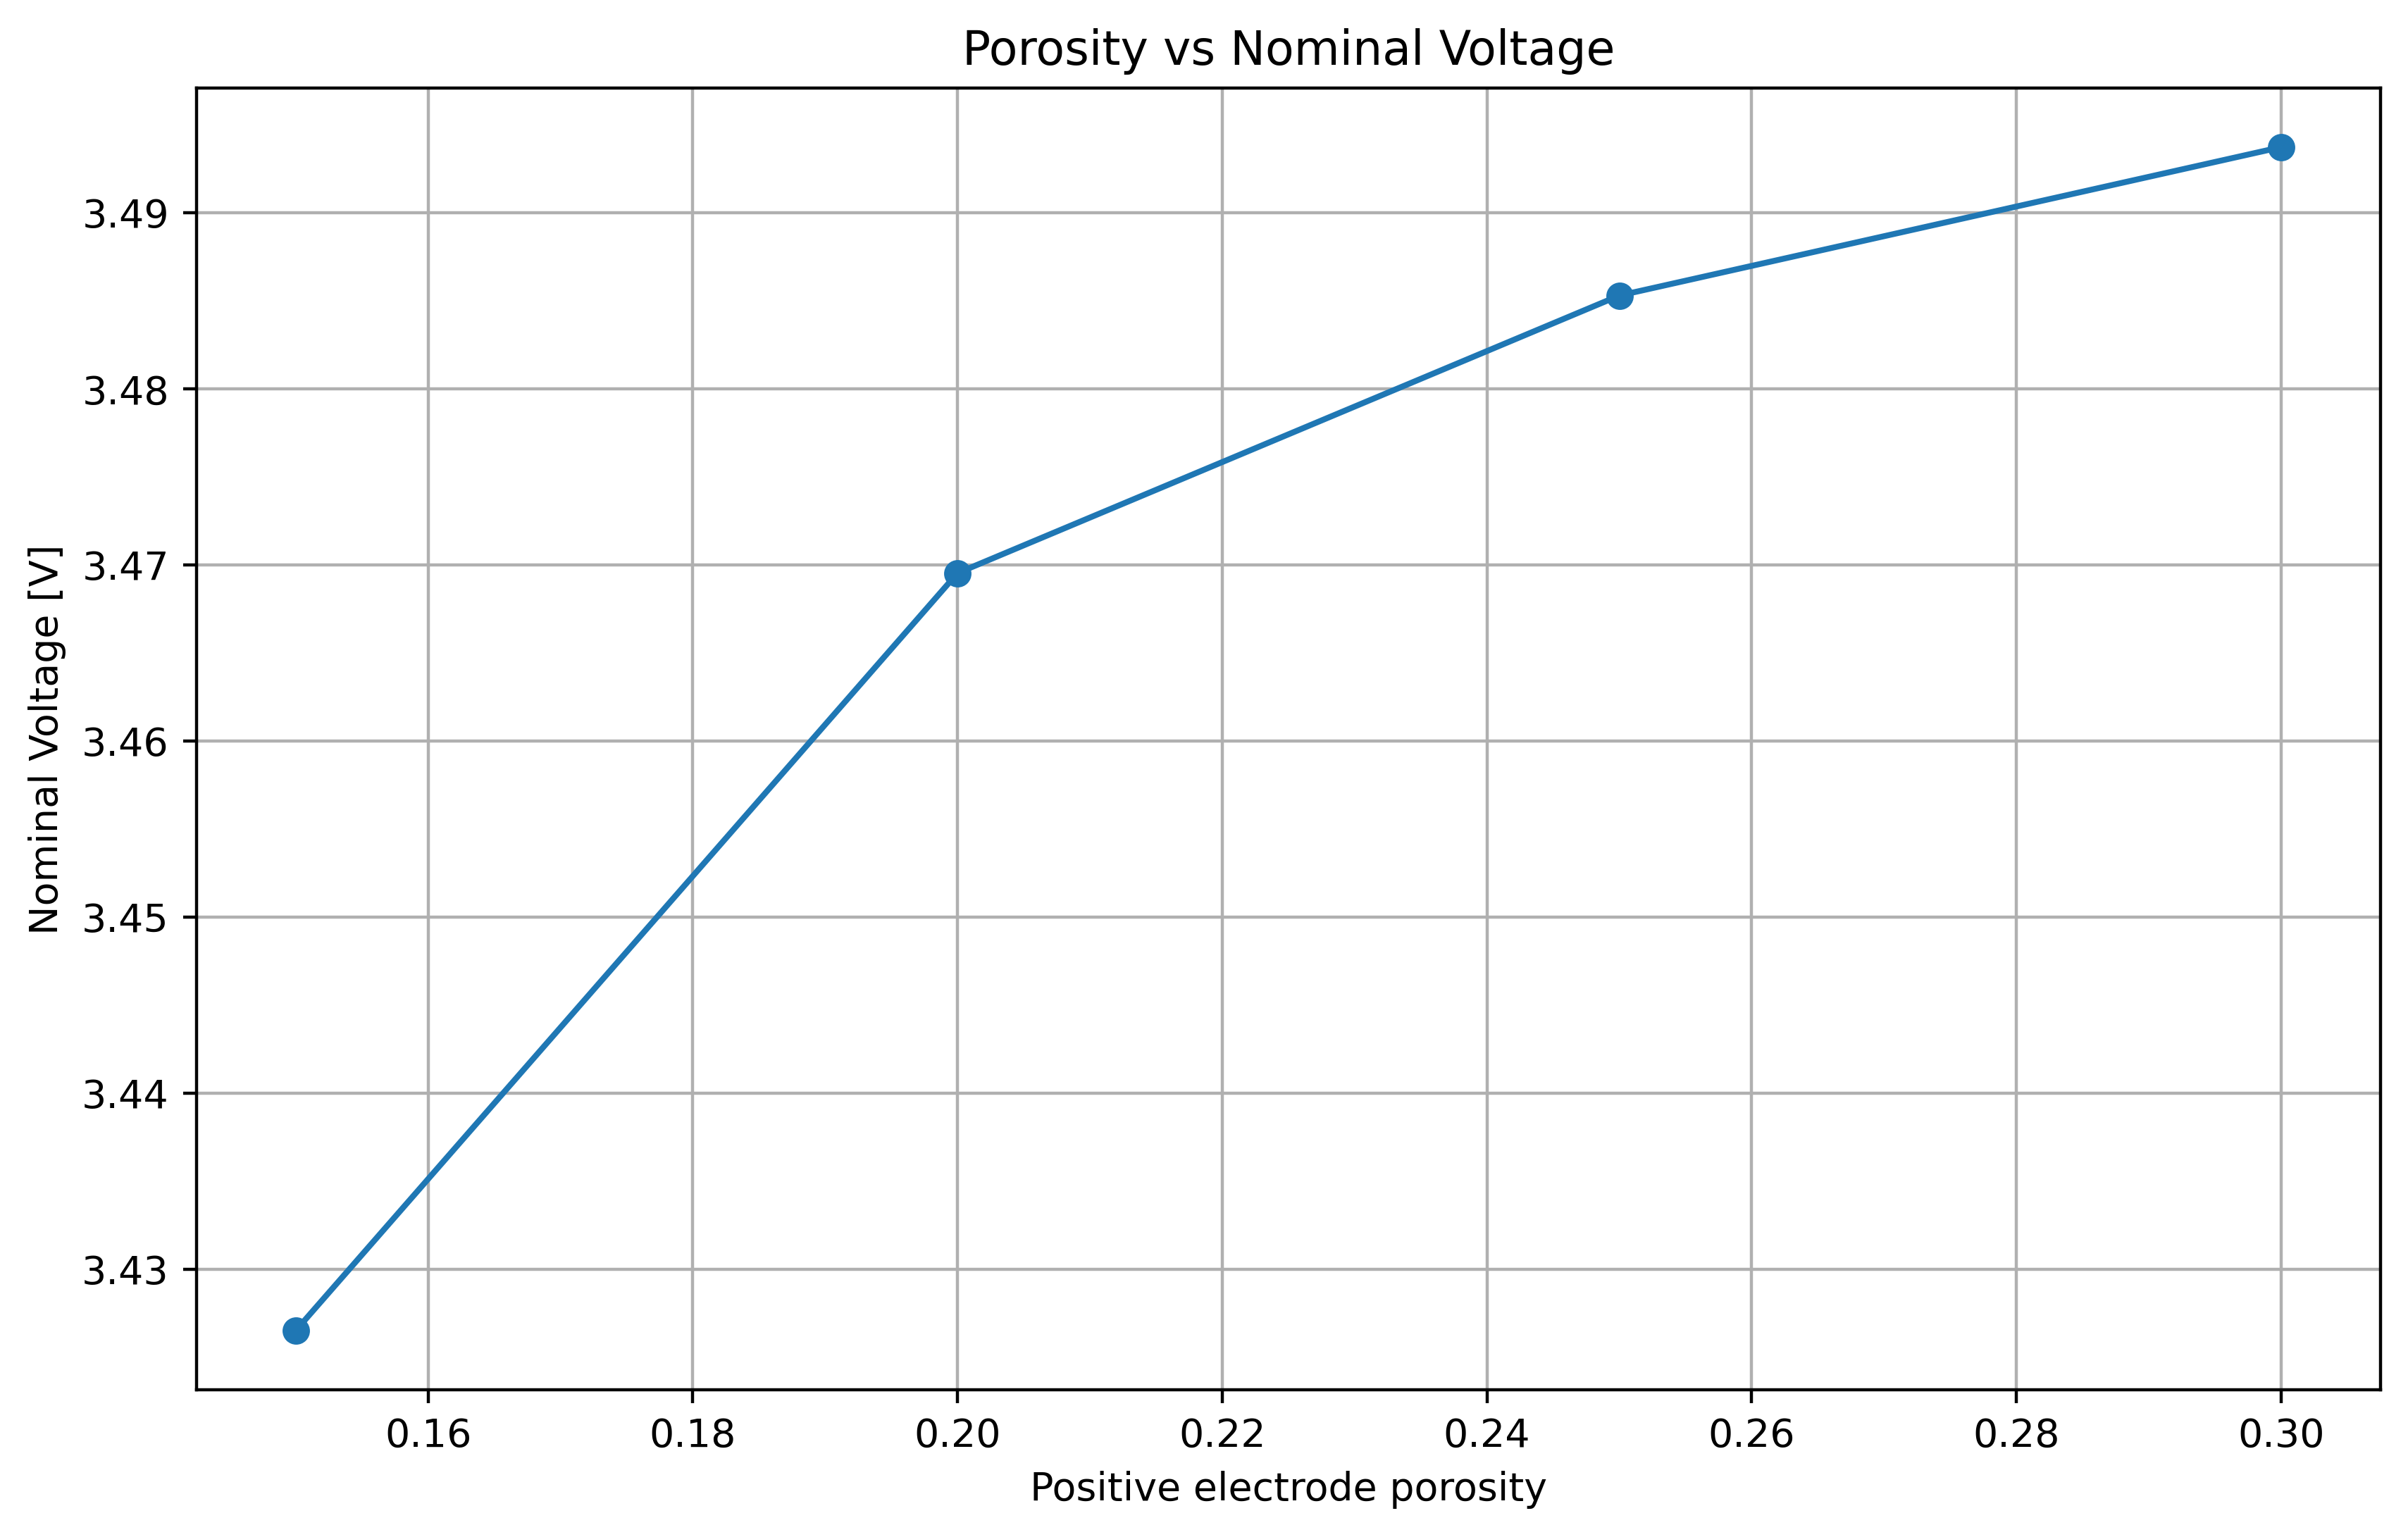

cath. thickness = 75.6um
cath. thickness = 75.6um
cath. thickness = 75.6um
cath. thickness = 75.6um


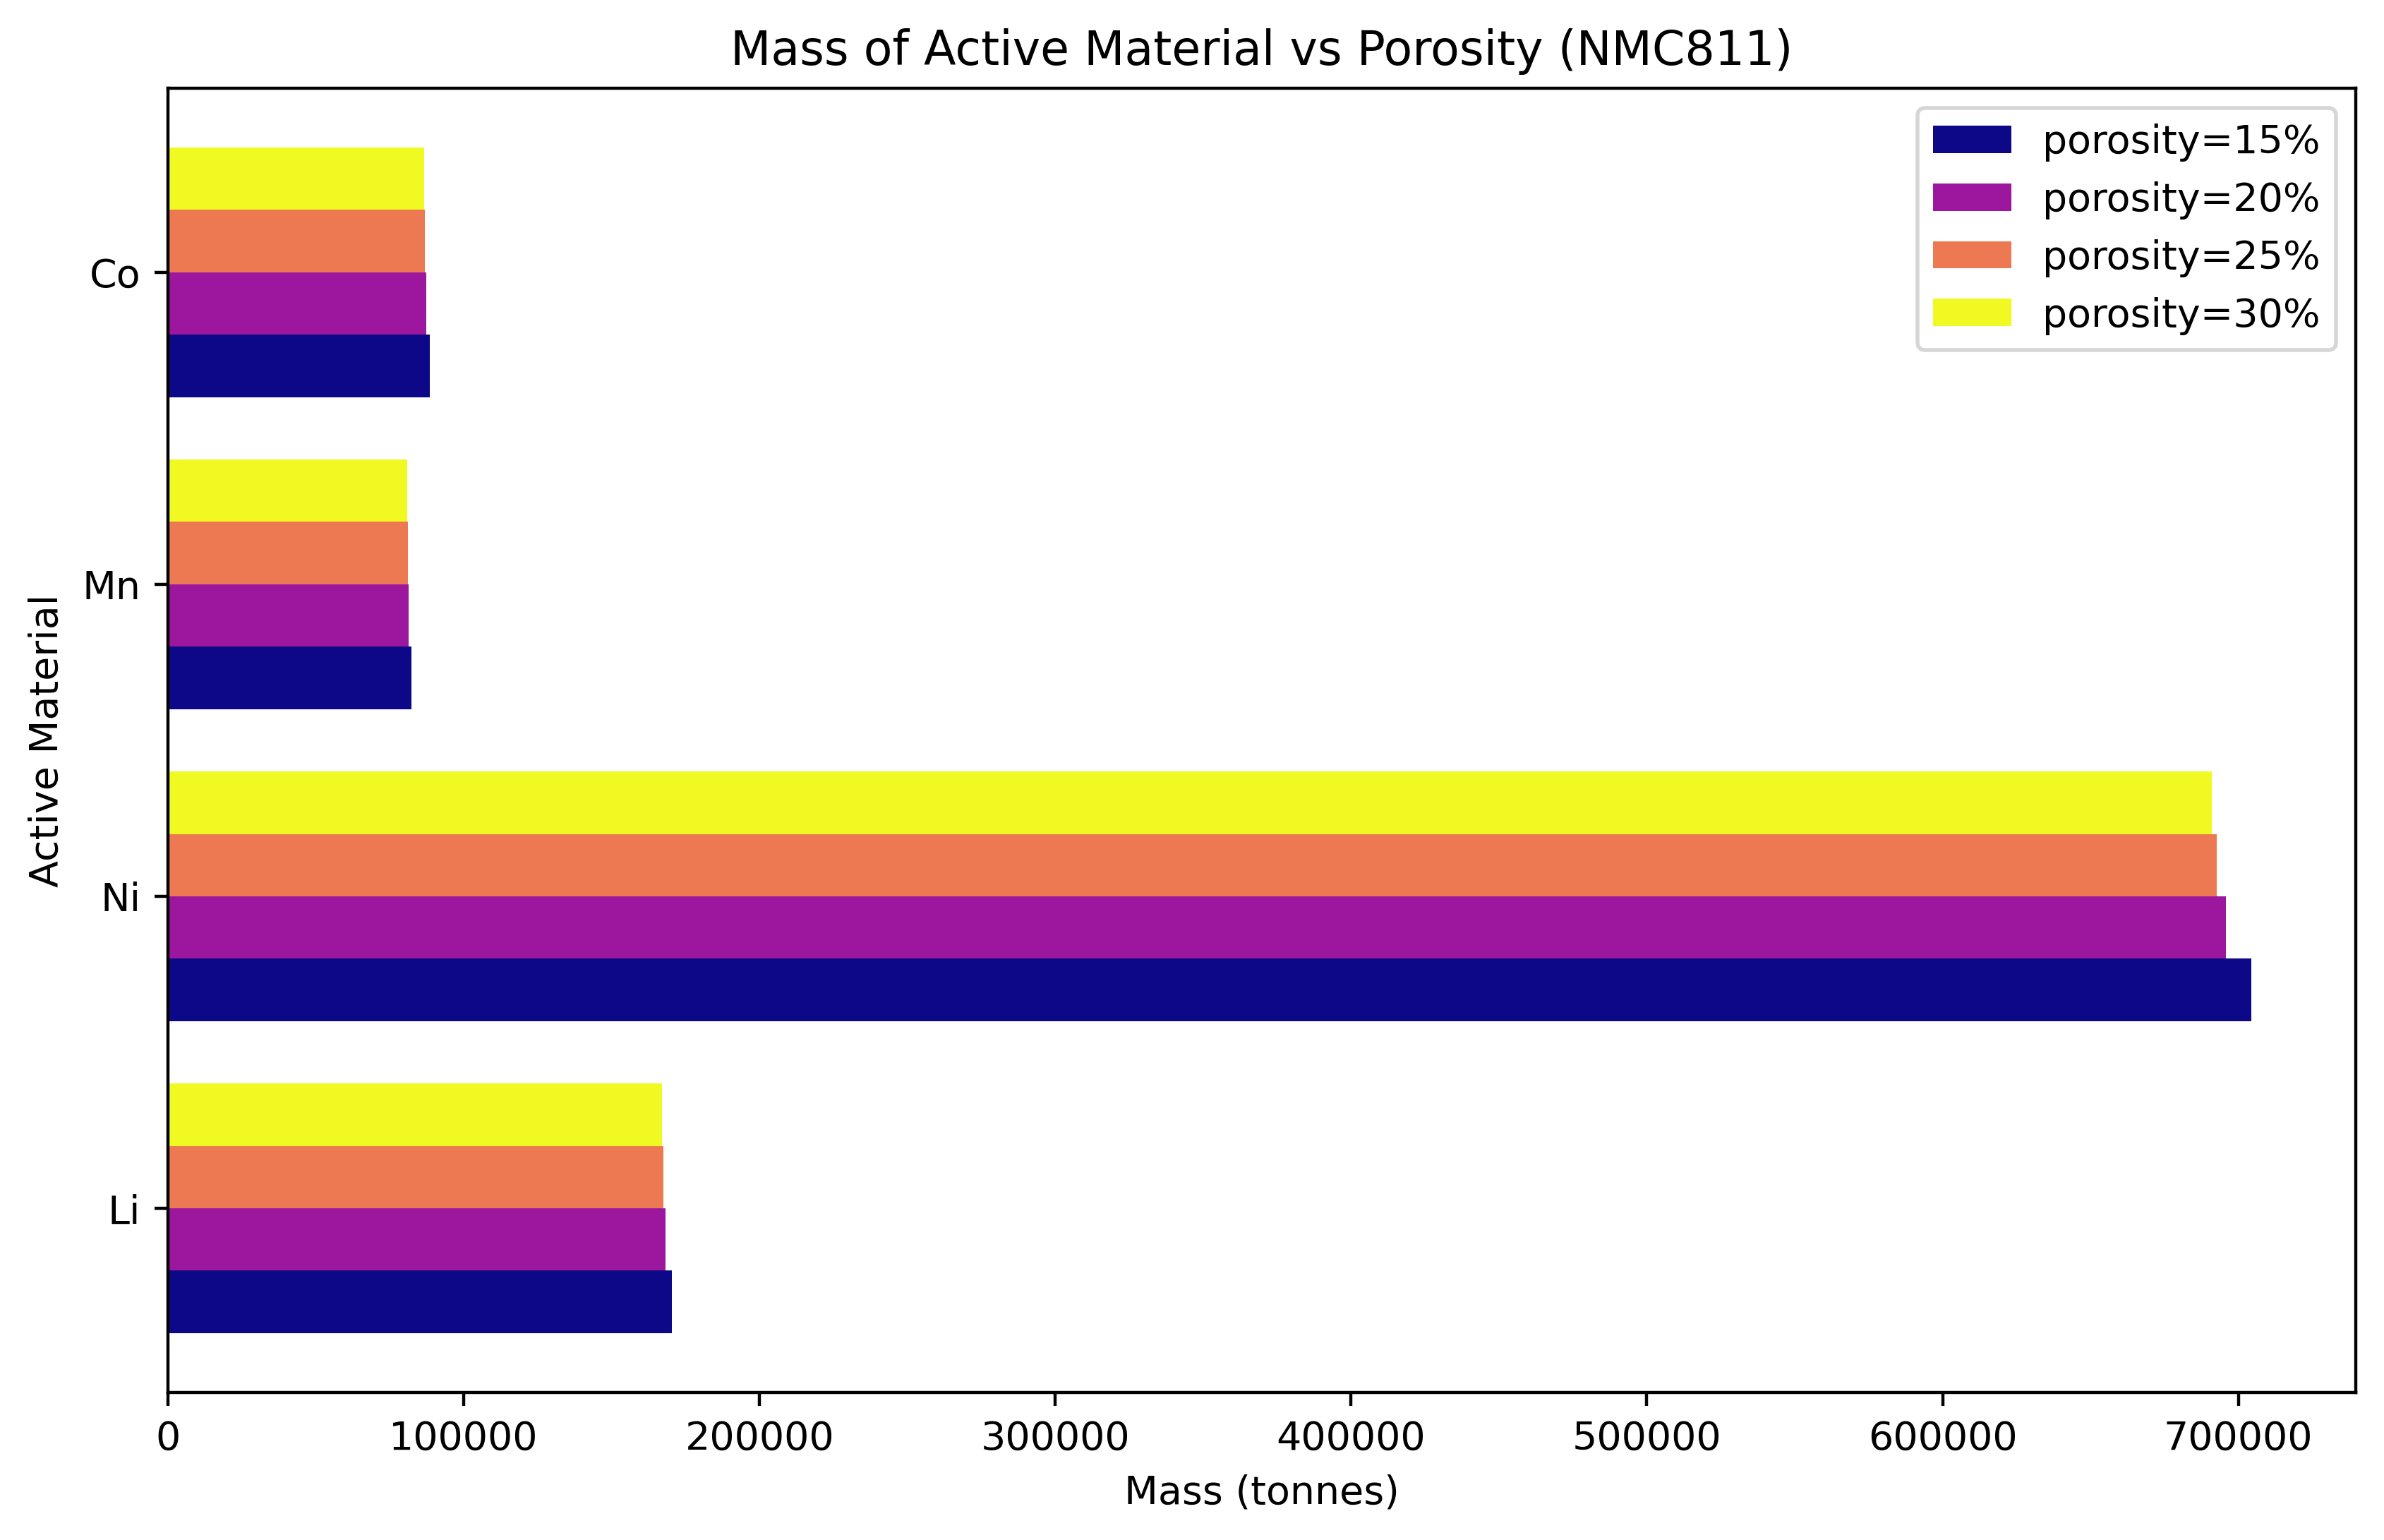

In [28]:
# input porosity, output critical mineral mass required (NMC811)

model = pybamm.lithium_ion.DFN()
parameter_values = pybamm.ParameterValues("Chen2020") # NMC811 parameter set
# parameter_values["Current function [A]"] = DEFAULT is 5 A
parameter_values["Positive electrode porosity"] = "[input]"

sim = pybamm.Simulation(model, parameter_values=parameter_values)

porosities = [0.15, 0.20, 0.25, 0.30]
av_voltages = []

for por in porosities:
    soln = sim.solve([0, 3600], inputs={"Positive electrode porosity": por})
    voltage = np.mean(soln["Voltage [V]"].data)  
    av_voltages.append(voltage)

plt.figure(dpi=400, figsize=(10, 6))
plt.plot(porosities, av_voltages, marker='o')
plt.xlabel("Positive electrode porosity")
plt.ylabel("Nominal Voltage [V]")
plt.title("Porosity vs Nominal Voltage")
plt.grid(True)
plt.show()

plt.figure(dpi=400, figsize=(10, 6))
from matplotlib import colormaps as cmap
cmap = plt.cm.plasma
colors = cmap(np.linspace(0,1,len(av_voltages)))
names = ['Li', 'Ni', 'Mn', 'Co']
for i, (voltage, porosity, color) in enumerate(zip(av_voltages,porosities,colors)): # i is the enumerate index, (voltage,porosity,color) each gets asigned the corresponding tuple value from zip
    mass = AM_calc(1000, voltage, "NMC811") # CHANGE CHEMISTRY 
    y_pos = np.arange(len(names)) + i*0.2
    plt.barh(y_pos, mass, color=color, height=0.2, label = f'porosity={porosity*100:.0f}%') 
    print(f'cath. thickness = {(parameter_values["Positive electrode thickness [m]"])*1000000}um')
    # print(f'cath. thickness = {(soln["Positive electrode thickness [m]"].data)*1000000}um') error because thickness isn't a variable in DFN but a parameter in Chen2020

plt.yticks(np.arange(len(names)) + 0.3, names)
plt.legend()
plt.xlabel('Mass (tonnes)')
plt.ylabel('Active Material')
plt.title('Mass of Active Material vs Porosity (NMC811)') 
# plt.grid(axis='x')
# ax = plt.gca()  # Get the current axes
# ax.set_axisbelow(True)
# ax.grid(True)
# plt.gca().xaxis.set_major_locator(plt.MultipleLocator(10000))
plt.show()





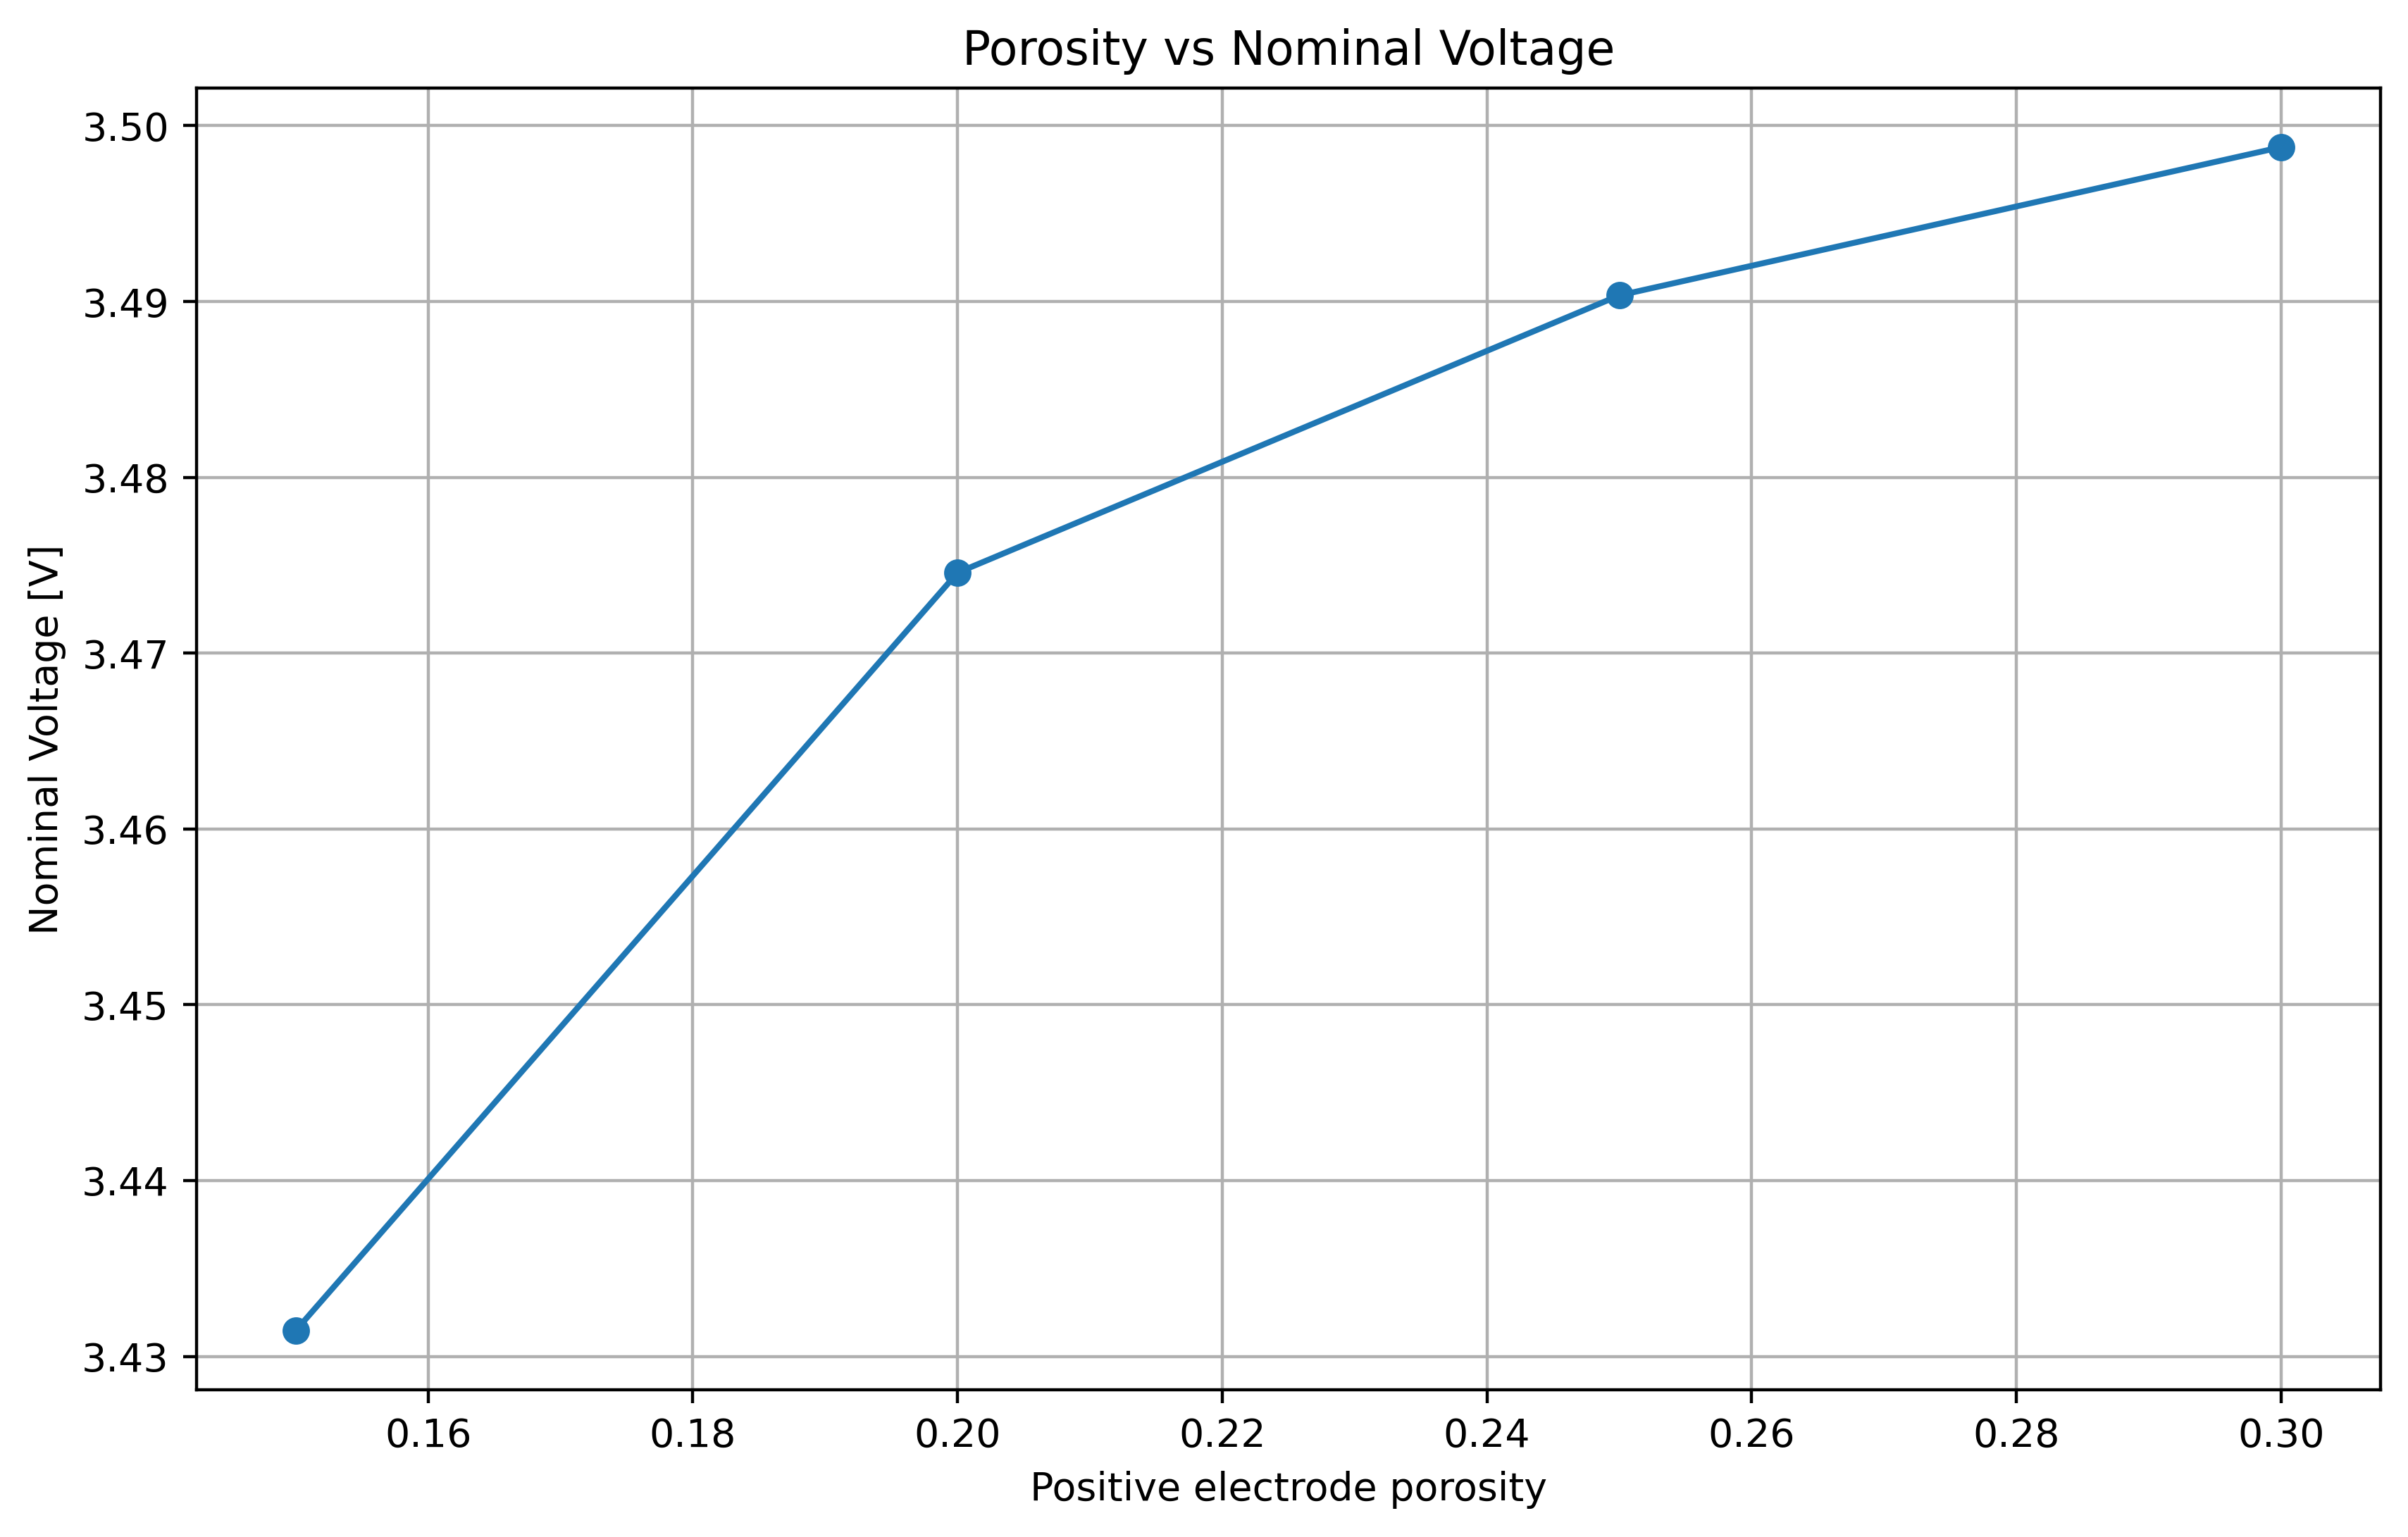

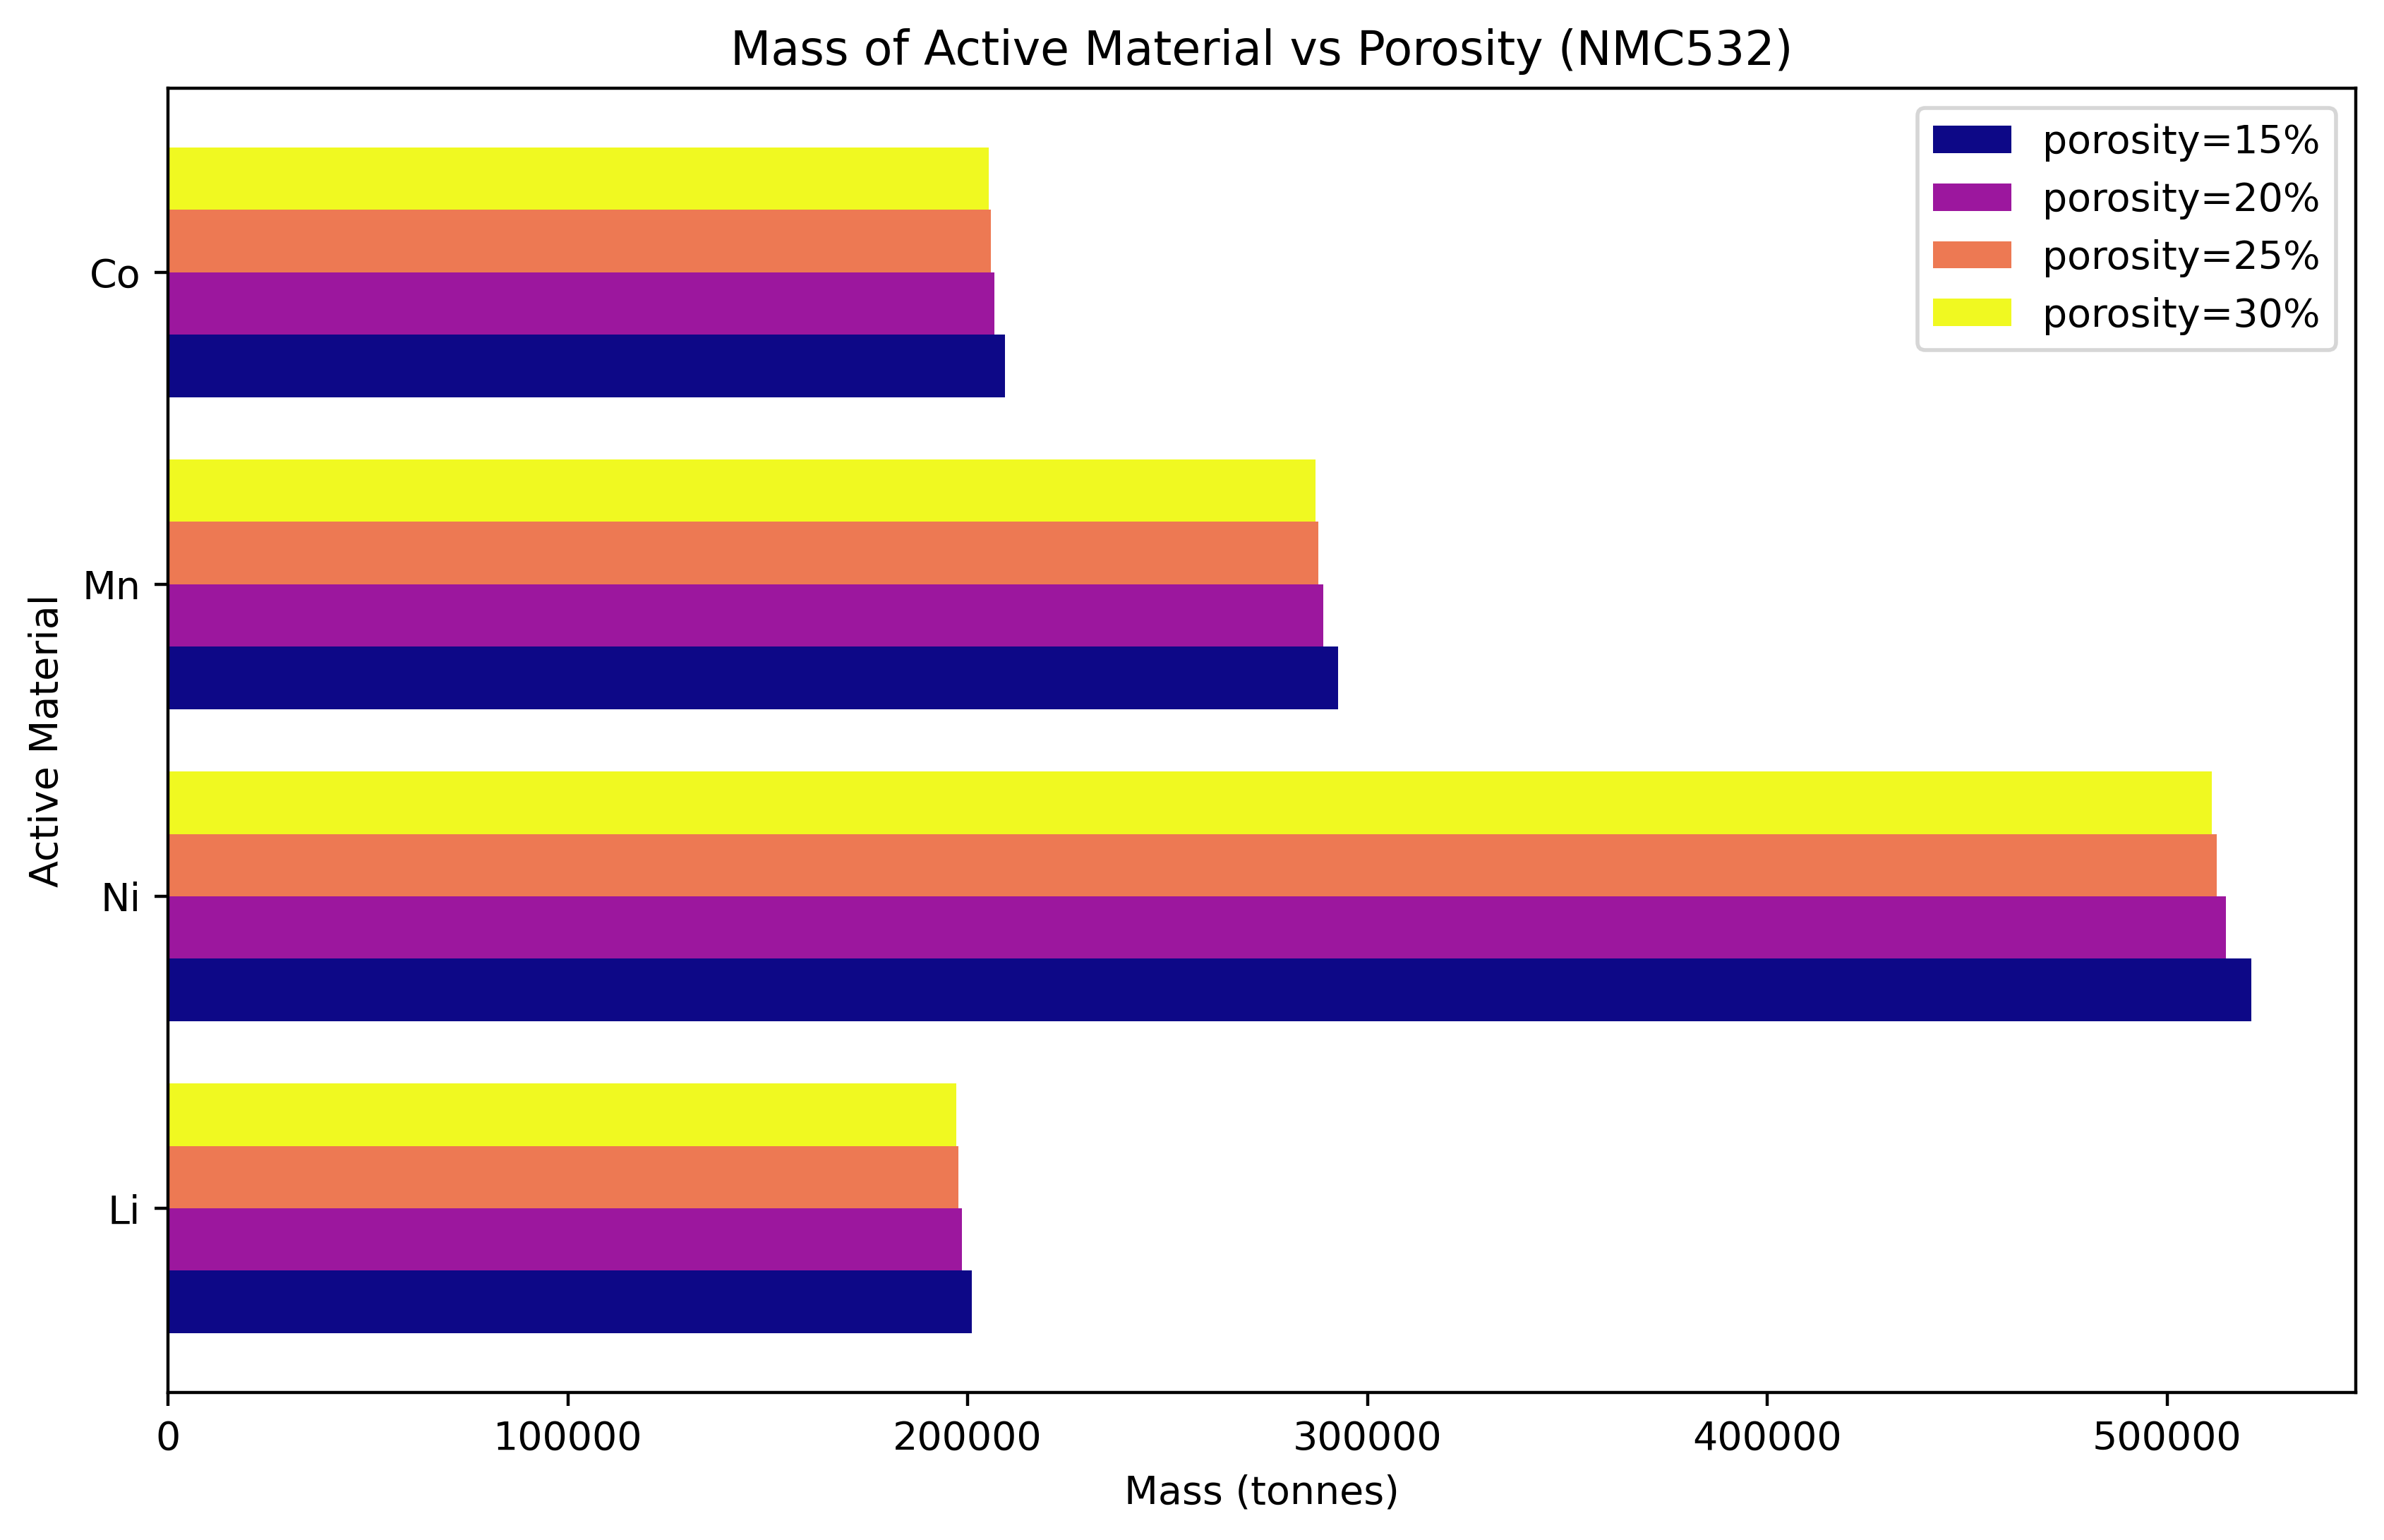

In [29]:
# NMC532 - input porosity, output critical mineral mass required 

model = pybamm.lithium_ion.DFN() 
parameter_values = pybamm.ParameterValues("Mohtat2020") # NMC532 parameter set 
# parameter_values["Current function [A]"] = DEFAULT is 5 A
parameter_values["Positive electrode porosity"] = "[input]"

# solver = pybamm.CasadiSolver(rtol=1e-4, atol=1e-6) # loosening tolerances to accomidate high current draw and unrealistically low porosities 

porosities = [0.15, 0.20, 0.25, 0.30]
av_voltages = []

for por in porosities:
    soln = sim.solve([0, 3600], inputs={"Positive electrode porosity": por}, initial_soc=1.0)
    voltage = np.mean(soln["Voltage [V]"].data)  # nominal voltage
    av_voltages.append(voltage)

plt.figure(dpi=400, figsize=(10, 6))
plt.plot(porosities, av_voltages, marker='o')
plt.xlabel("Positive electrode porosity")
plt.ylabel("Nominal Voltage [V]")
plt.title("Porosity vs Nominal Voltage")
plt.grid(True)
plt.show()

plt.figure(dpi=400, figsize=(10, 6))
from matplotlib import colormaps as cmap
cmap = plt.cm.plasma
colors = cmap(np.linspace(0,1,len(av_voltages)))
names = ['Li', 'Ni', 'Mn', 'Co']
for i, (voltage, porosity, color) in enumerate(zip(av_voltages,porosities,colors)): # i is the enumerate index, (voltage,porosity,color) each gets asigned the corresponding tuple value from zip
    mass = AM_calc(1000, voltage, "NMC532") # CHANGE CHEMISTRY 
    y_pos = np.arange(len(names)) + i*0.2
    plt.barh(y_pos, mass, color=color, height = 0.2, label = f'porosity={porosity*100:.0f}%') 

plt.yticks(np.arange(len(names)) + 0.3, names)
plt.legend()
plt.xlabel('Mass (tonnes)')
plt.ylabel('Active Material')
plt.title('Mass of Active Material vs Porosity (NMC532)')
plt.show()


At t = 222.02 and h = 1.41786e-14, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 222.02 and h = 1.26151e-18, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 222.02 and h = 3.14955e-14, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 222.02 and h = 1.46479e-14, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 222.02 and h = 5.84507e-17, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 222.02 and h = 9.68995e-15, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 222.02 and h = 1.26265e-14, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 222.02 and h = 3.59711e-19, the corrector convergence failed repeatedly or with |h| = hmin.


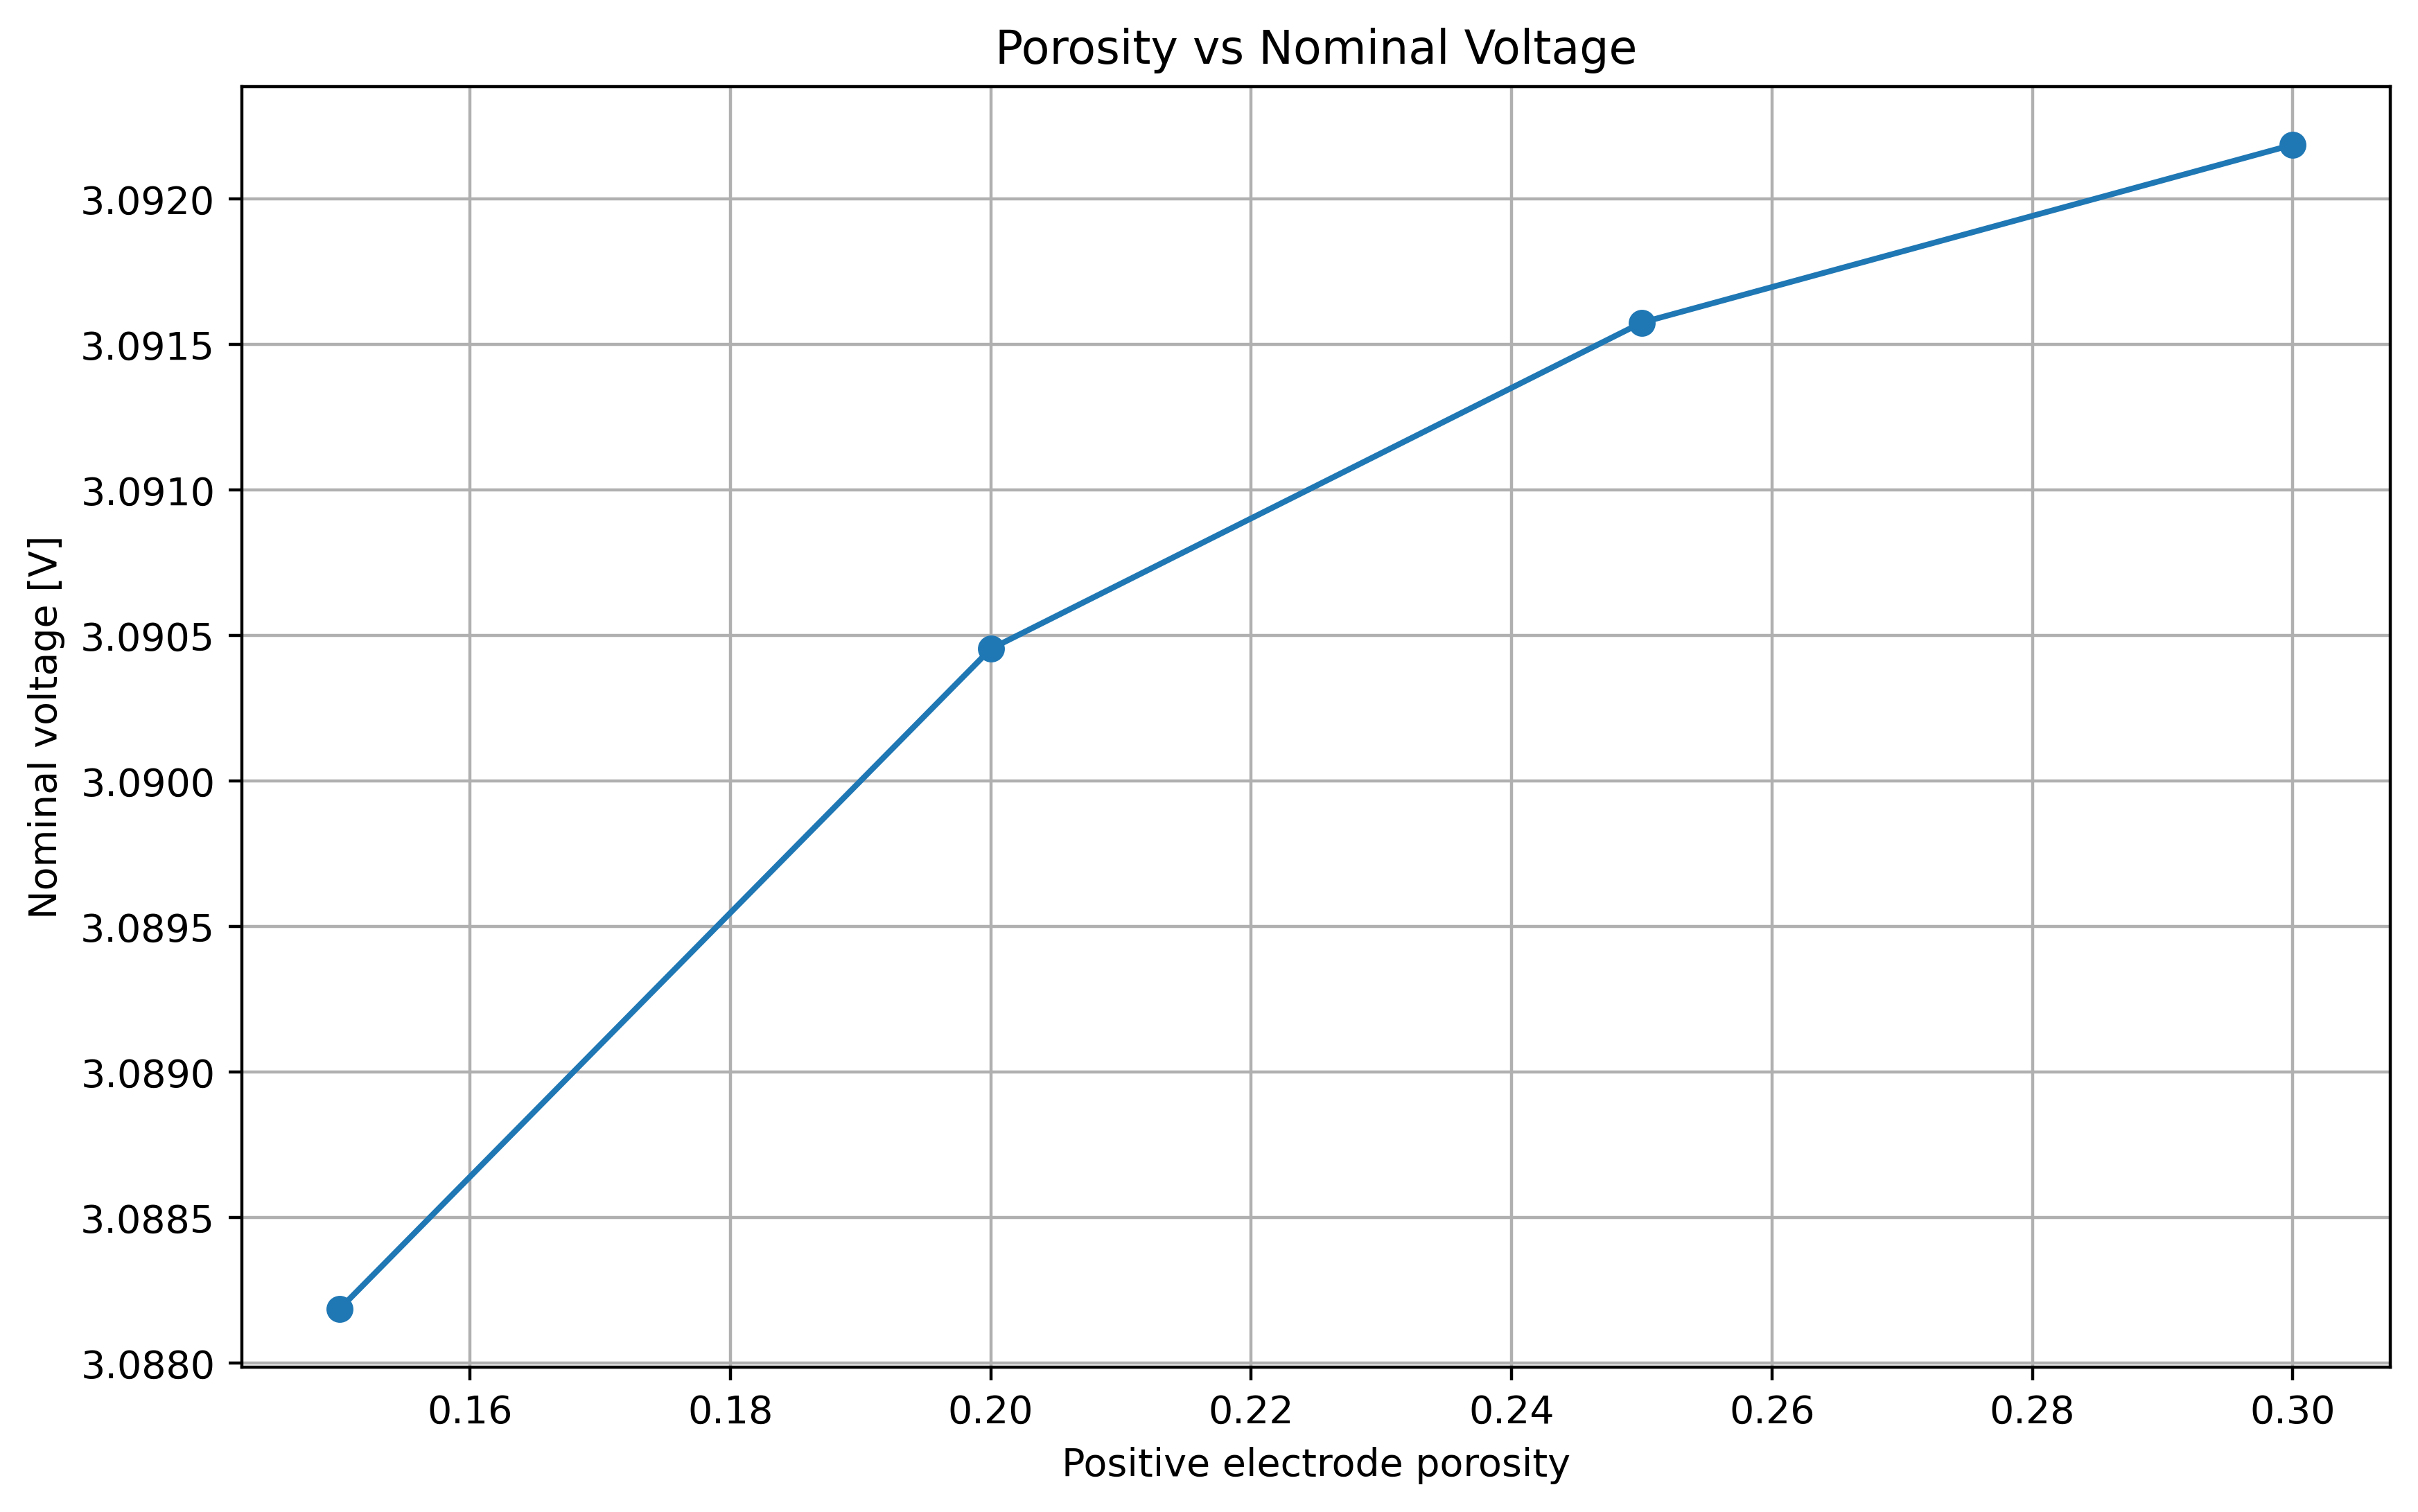

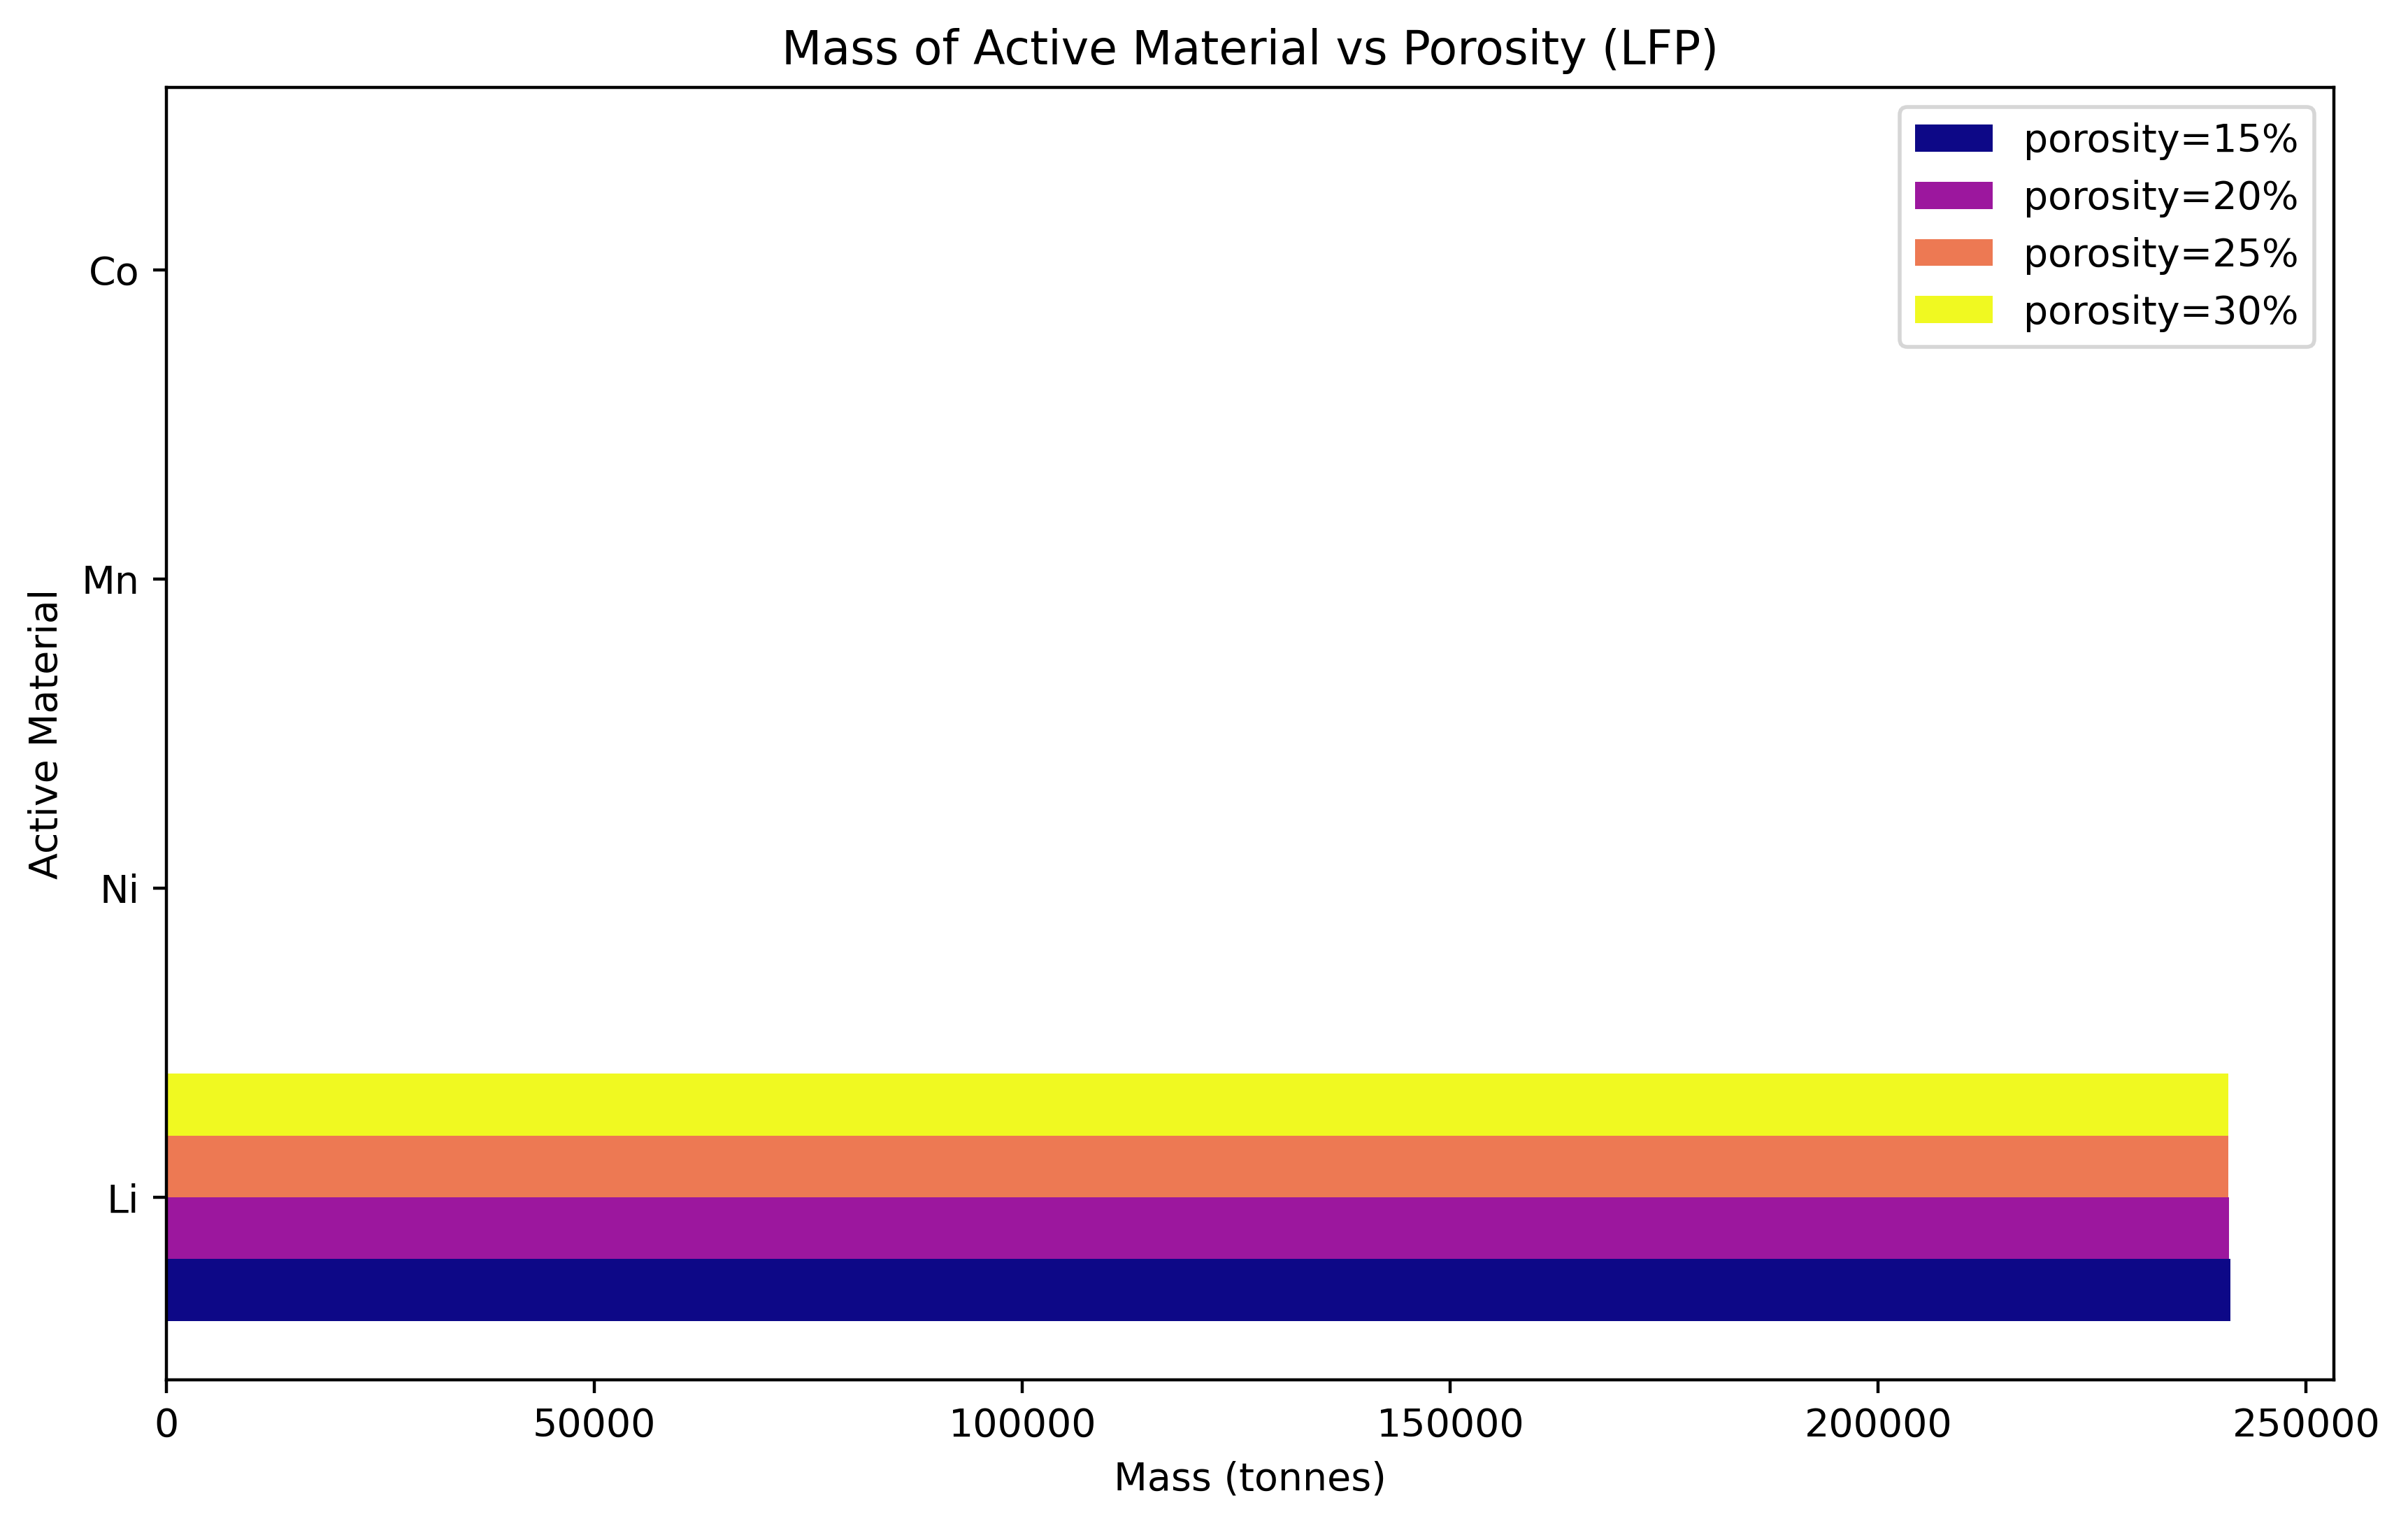

In [30]:
# LFP - input porosity, output critical mineral mass required 


model = pybamm.lithium_ion.DFN() 
parameter_values = pybamm.ParameterValues("Prada2013") # LFP parameter set 
# parameter_values["Current function [A]"] = DEFAULT is 5 A
parameter_values["Positive electrode porosity"] = "[input]"

# solver = pybamm.CasadiSolver(rtol=1e-4, atol=1e-6) # loosening tolerances to accomidate high current draw and unrealistically low porosities 
sim = pybamm.Simulation(model, parameter_values=parameter_values)

porosities = [0.15, 0.20, 0.25, 0.30]
av_voltages = []

for por in porosities:
    soln = sim.solve([0, 3600], inputs={"Positive electrode porosity": por})
    voltage = np.mean(soln["Voltage [V]"].data)  # nominal voltage
    av_voltages.append(voltage)

plt.figure(dpi=400, figsize=(10, 6))
plt.plot(porosities, av_voltages, marker='o')
plt.xlabel("Positive electrode porosity")
plt.ylabel("Nominal voltage [V]")
plt.title("Porosity vs Nominal Voltage")
plt.grid(True)
plt.show()

plt.figure(dpi=400, figsize=(10, 6))
from matplotlib import colormaps as cmap
cmap = plt.cm.plasma
colors = cmap(np.linspace(0,1,len(av_voltages)))
names = ['Li', 'Ni', 'Mn', 'Co']
for i, (voltage, porosity, color) in enumerate(zip(av_voltages,porosities,colors)): # i is the enumerate index, (voltage,porosity,color) each gets asigned the corresponding tuple value from zip
    mass = AM_calc(1000, voltage, "LFP") # CHANGE CHEMISTRY 
    y_pos = np.arange(len(names)) + i*0.2
    plt.barh(y_pos, mass, color=color, height = 0.2, label = f'porosity={porosity*100:.0f}%') 

plt.yticks(np.arange(len(names)) + 0.3, names)
plt.legend()
plt.xlabel('Mass (tonnes)')
plt.ylabel('Active Material')
plt.title('Mass of Active Material vs Porosity (LFP)')
plt.show()

Vary cathode particle size, output mass of critical mineral required for 1. NMC811, 2. NMC622 

Solving for radius = 5 µm
Solving for radius = 10 µm


At t = 92.8215 and h = 4.00159e-14, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 92.8215, , mxstep steps taken before reaching tout.
At t = 92.8215 and h = 8.3356e-14, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 20.0943, , mxstep steps taken before reaching tout.
At t = 20.0943, , mxstep steps taken before reaching tout.
At t = 1.34426, , mxstep steps taken before reaching tout.
At t = 1.34427, , mxstep steps taken before reaching tout.
At t = 1.34427, , mxstep steps taken before reaching tout.
At t = 1.34427 and h = 1.70868e-14, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.17239, , mxstep steps taken before reaching tout.
At t = 0.172387 and h = 3.19155e-15, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.172391, , mxstep steps taken before reaching tout.
At t = 0.0259065, , mxstep steps taken before reaching tout.
At t = 0.0259043 and h = 2.21297e-15, the corrector convergence fa

Solving for radius = 15 µm


At t = 156.975 and h = 8.39411e-15, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 156.975, , mxstep steps taken before reaching tout.
At t = 11.5207, , mxstep steps taken before reaching tout.
At t = 11.5207, , mxstep steps taken before reaching tout.
At t = 11.5207, , mxstep steps taken before reaching tout.
At t = 11.5207, , mxstep steps taken before reaching tout.
At t = 2.14574 and h = 4.99709e-14, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 2.14574, , mxstep steps taken before reaching tout.
At t = 2.14574 and h = 5.78137e-14, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.973868, , mxstep steps taken before reaching tout.
At t = 0.387929, , mxstep steps taken before reaching tout.
At t = 0.0949618, , mxstep steps taken before reaching tout.
At t = 0.0949624, , mxstep steps taken before reaching tout.
At t = 0.0217187, , mxstep steps taken before reaching tout.
At t = 0.0217193, , mxstep steps taken befo

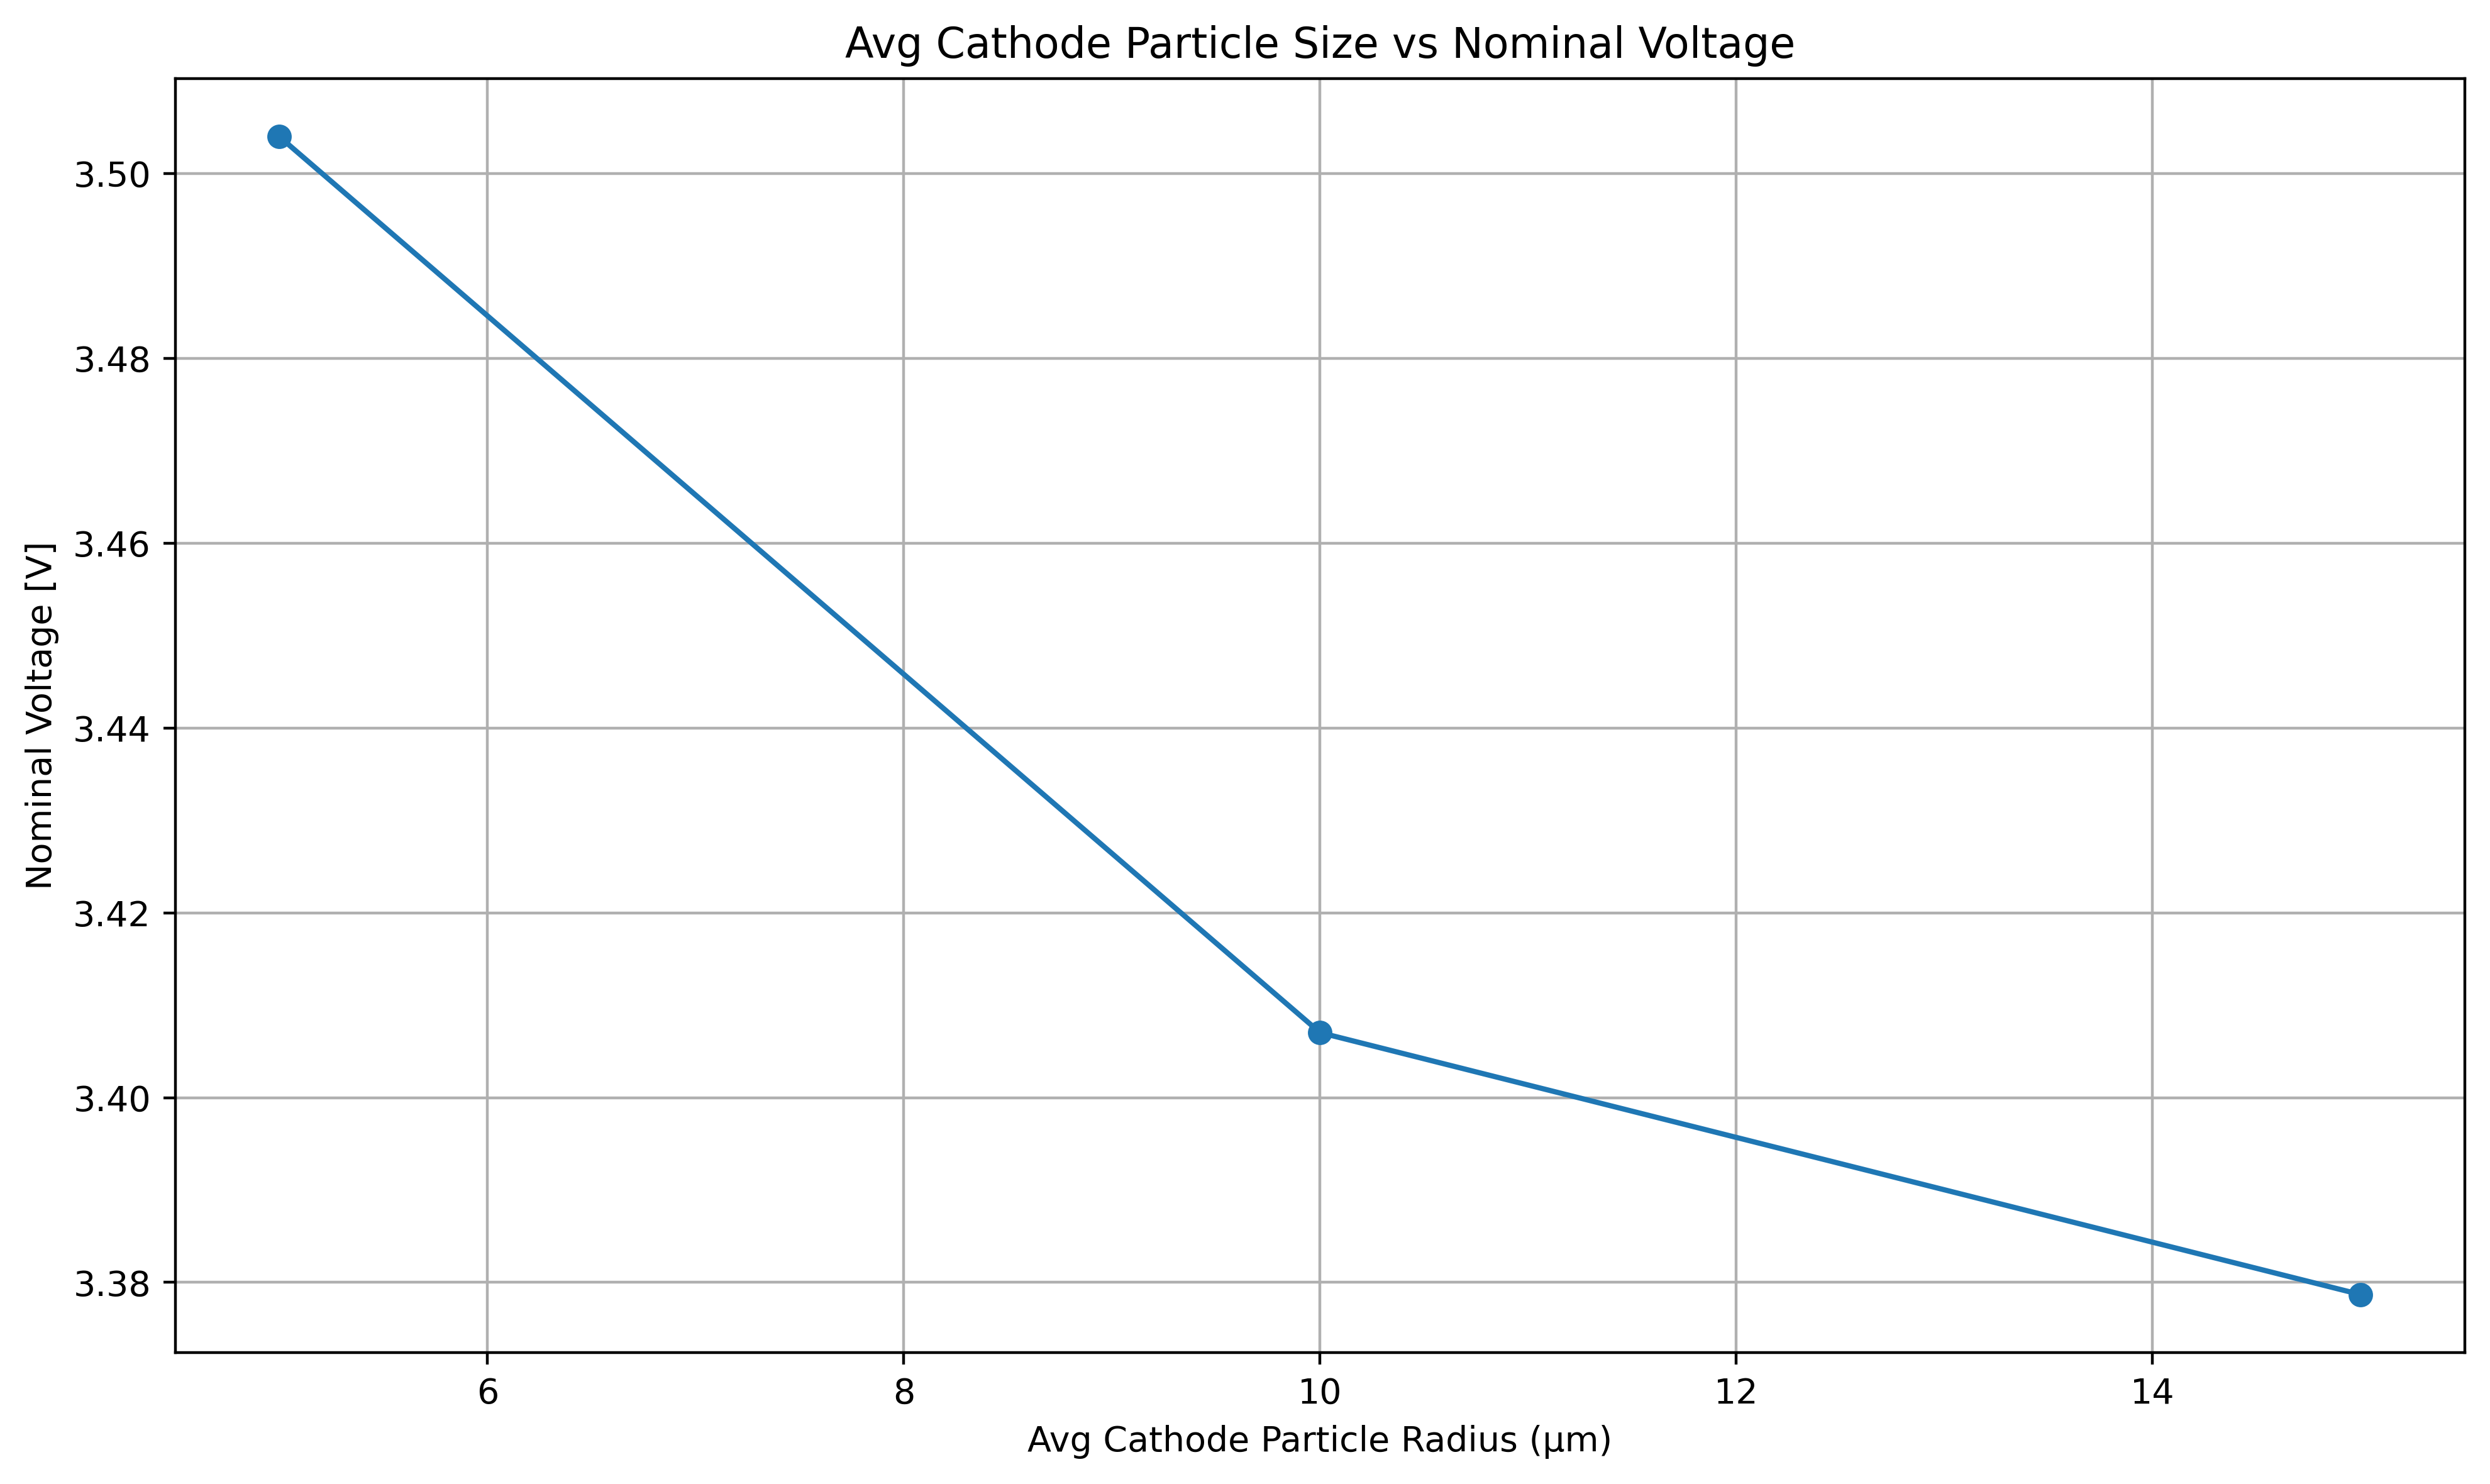

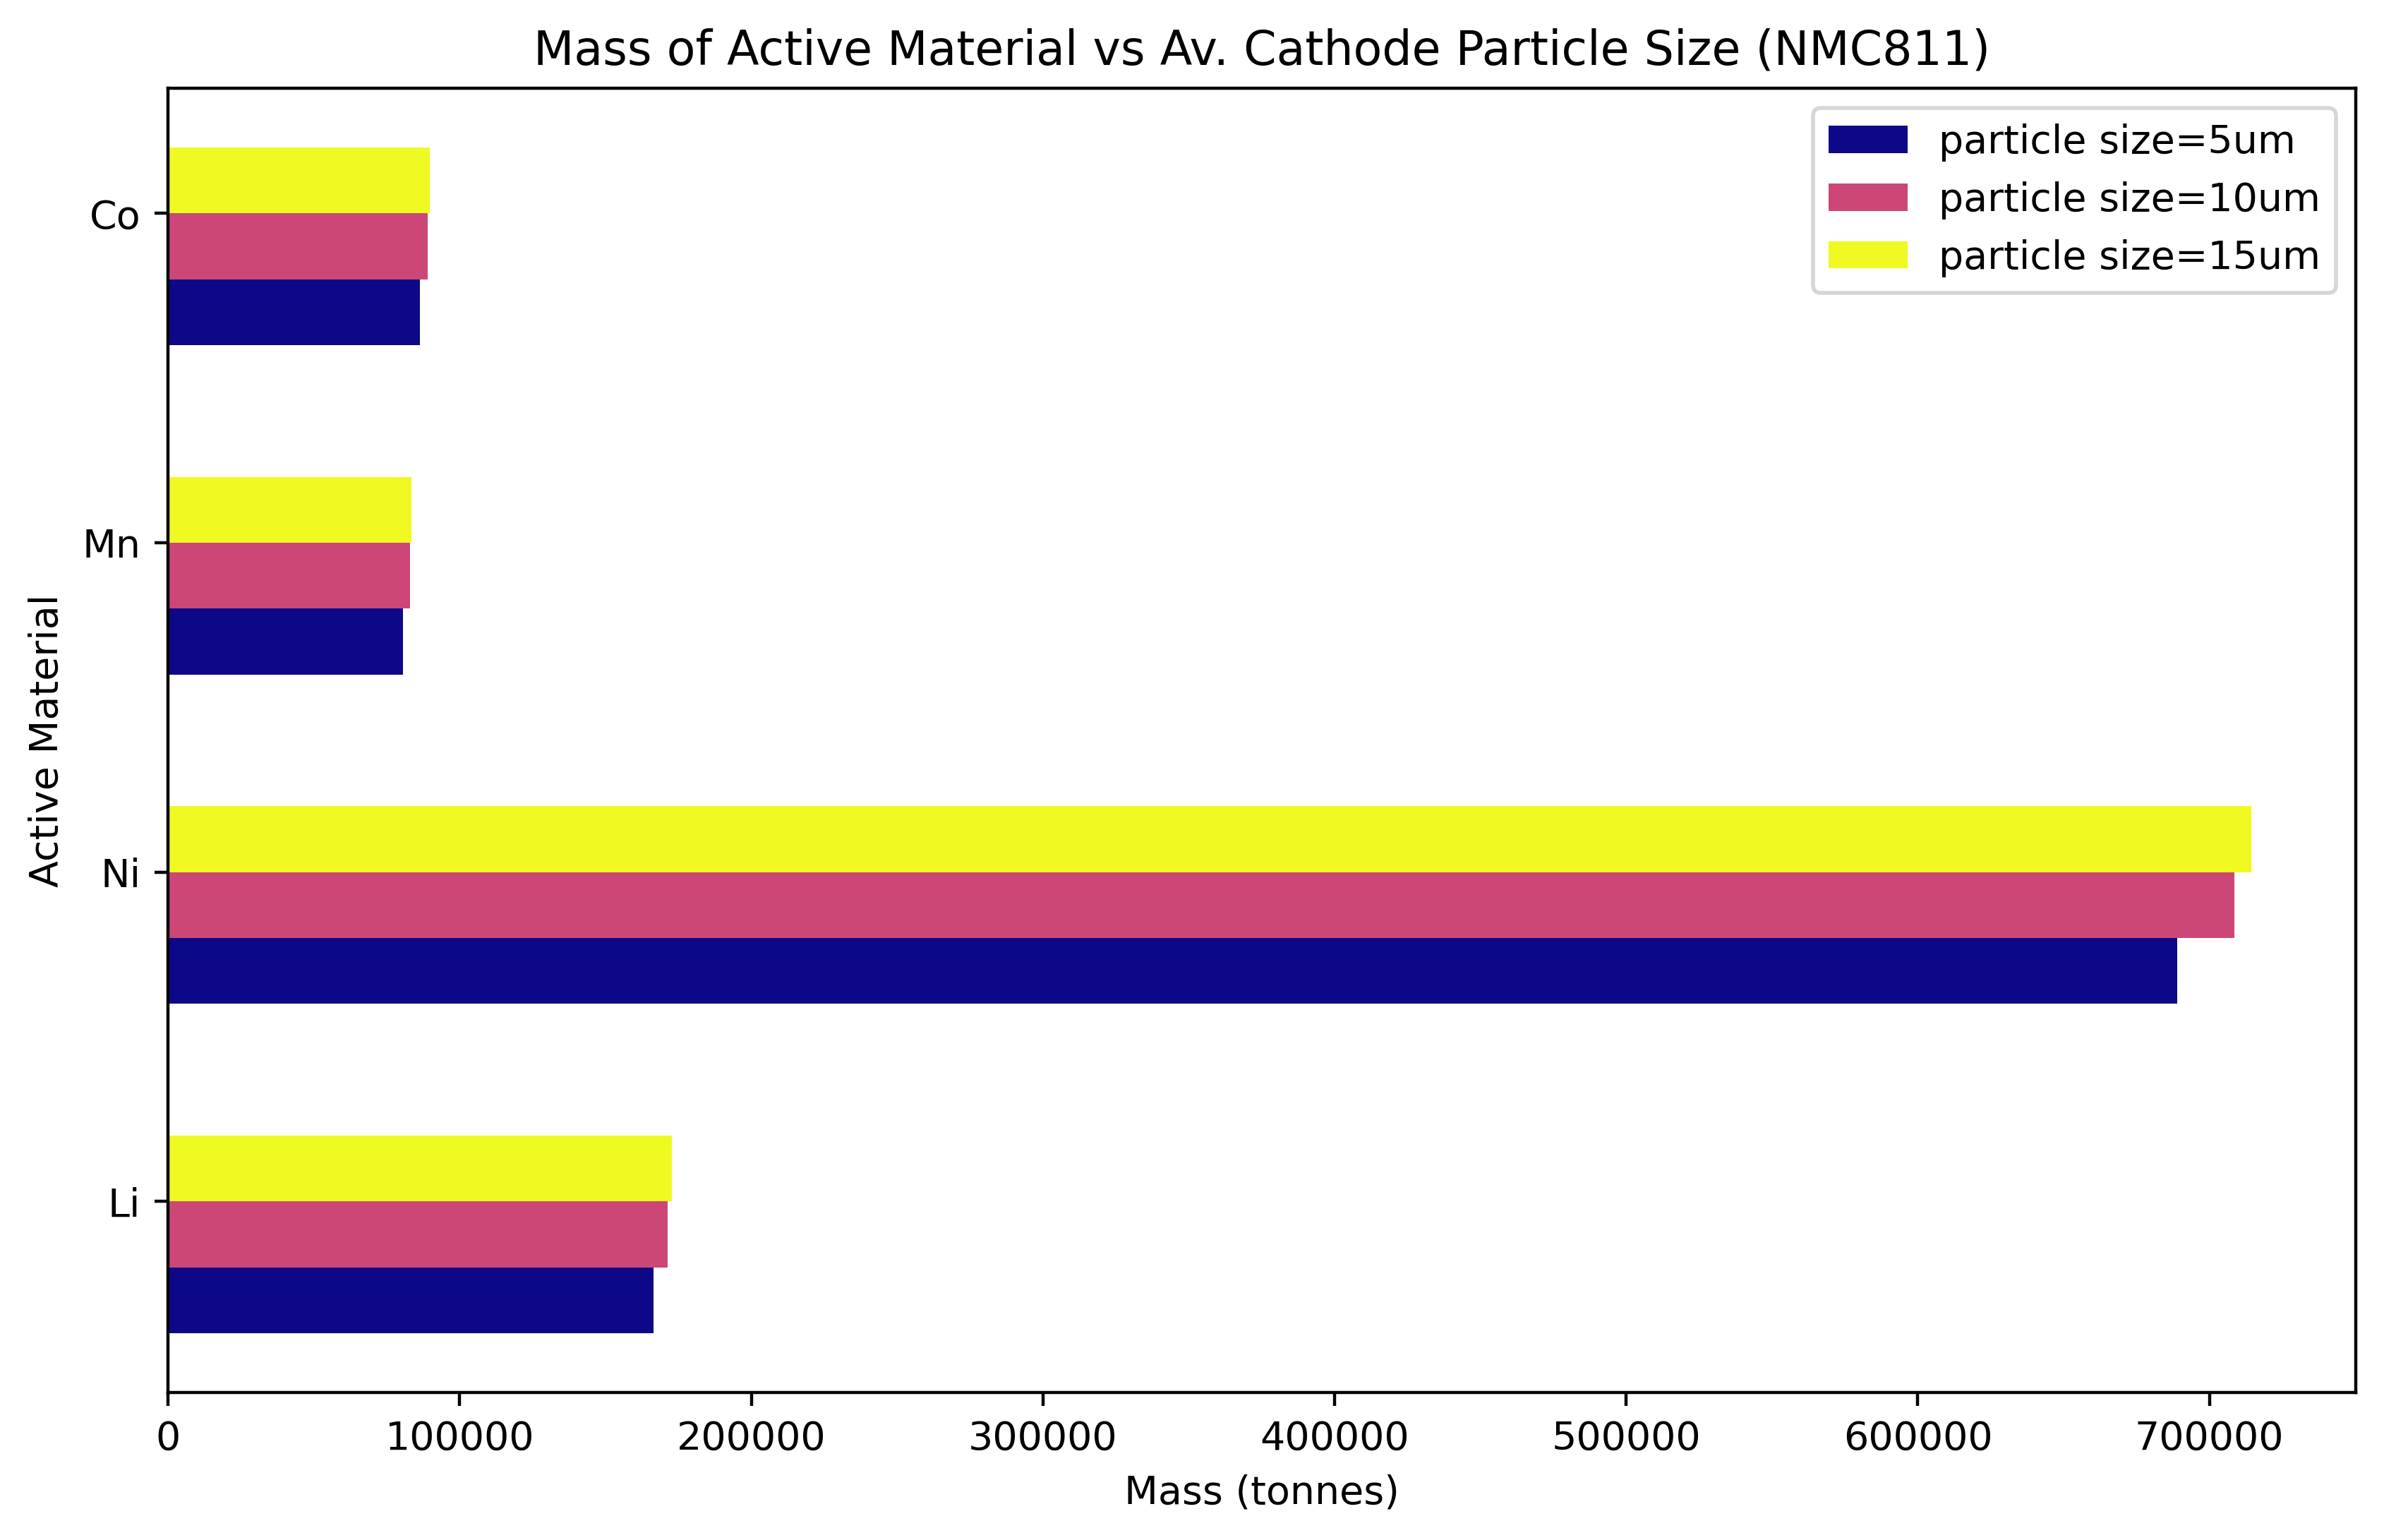

In [31]:
# vary cathode particle size, output mass critical mineral required (NMC811) 

particle_sizes_um = [5, 10, 15]
particle_sizes_m = [r * 1e-6 for r in particle_sizes_um]

av_voltages = []
for radius_m in particle_sizes_m:
    print(f"Solving for radius = {radius_m * 1e6:.0f} µm")

    try:
        # Set up model and parameters
        model = pybamm.lithium_ion.DFN()
        params = pybamm.ParameterValues("Chen2020") # NMC811 parameters
        params.update({"Positive particle radius [m]": radius_m})

        # Use a more stable solver (Casadi-based)
        solver = pybamm.CasadiSolver(rtol=1e-6, atol=1e-8)
        
        # Build and run the simulation
        sim = pybamm.Simulation(model, parameter_values=params, solver=solver)
        solution = sim.solve([0, 3600])

        # Compute average voltage
        voltage = np.mean(solution["Voltage [V]"].data)
        av_voltages.append(voltage)

    except pybamm.SolverError as e:
        print(f"Solver failed for radius = {radius_m * 1e6:.0f} µm. Error: {e}")
        av_voltages.append(np.nan)  

# Plot the results
plt.figure(dpi=400, figsize=(10, 6))
plt.plot(particle_sizes_um, av_voltages, marker='o', linestyle='-', color='tab:blue')
plt.xlabel("Avg Cathode Particle Radius (µm)")
plt.ylabel("Nominal Voltage [V]")
plt.title("Avg Cathode Particle Size vs Nominal Voltage")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(dpi=400, figsize=(10, 6))
from matplotlib import colormaps as cmap
cmap = plt.cm.plasma
colors = cmap(np.linspace(0,1,len(av_voltages)))
names = ['Li', 'Ni', 'Mn', 'Co']
for i, (voltage, size, color) in enumerate(zip(av_voltages,particle_sizes_um,colors)): # i is the enumerate index, (voltage,porosity,color) each gets asigned the corresponding tuple value from zip
    mass = AM_calc(1000, voltage, "NMC811") # CHANGE CHEMISTRY 
    y_pos = np.arange(len(names)) + i*0.2
    plt.barh(y_pos, mass, color=color, height = 0.2, label = f'particle size={size}um') 

plt.yticks(np.arange(len(names)) + 0.3, names)
plt.legend()
plt.xlabel('Mass (tonnes)')
plt.ylabel('Active Material')
plt.title('Mass of Active Material vs Av. Cathode Particle Size (NMC811)')
plt.show()

Solving for radius = 5 µm
Solving for radius = 10 µm


At t = 294.657, , mxstep steps taken before reaching tout.


Solving for radius = 15 µm


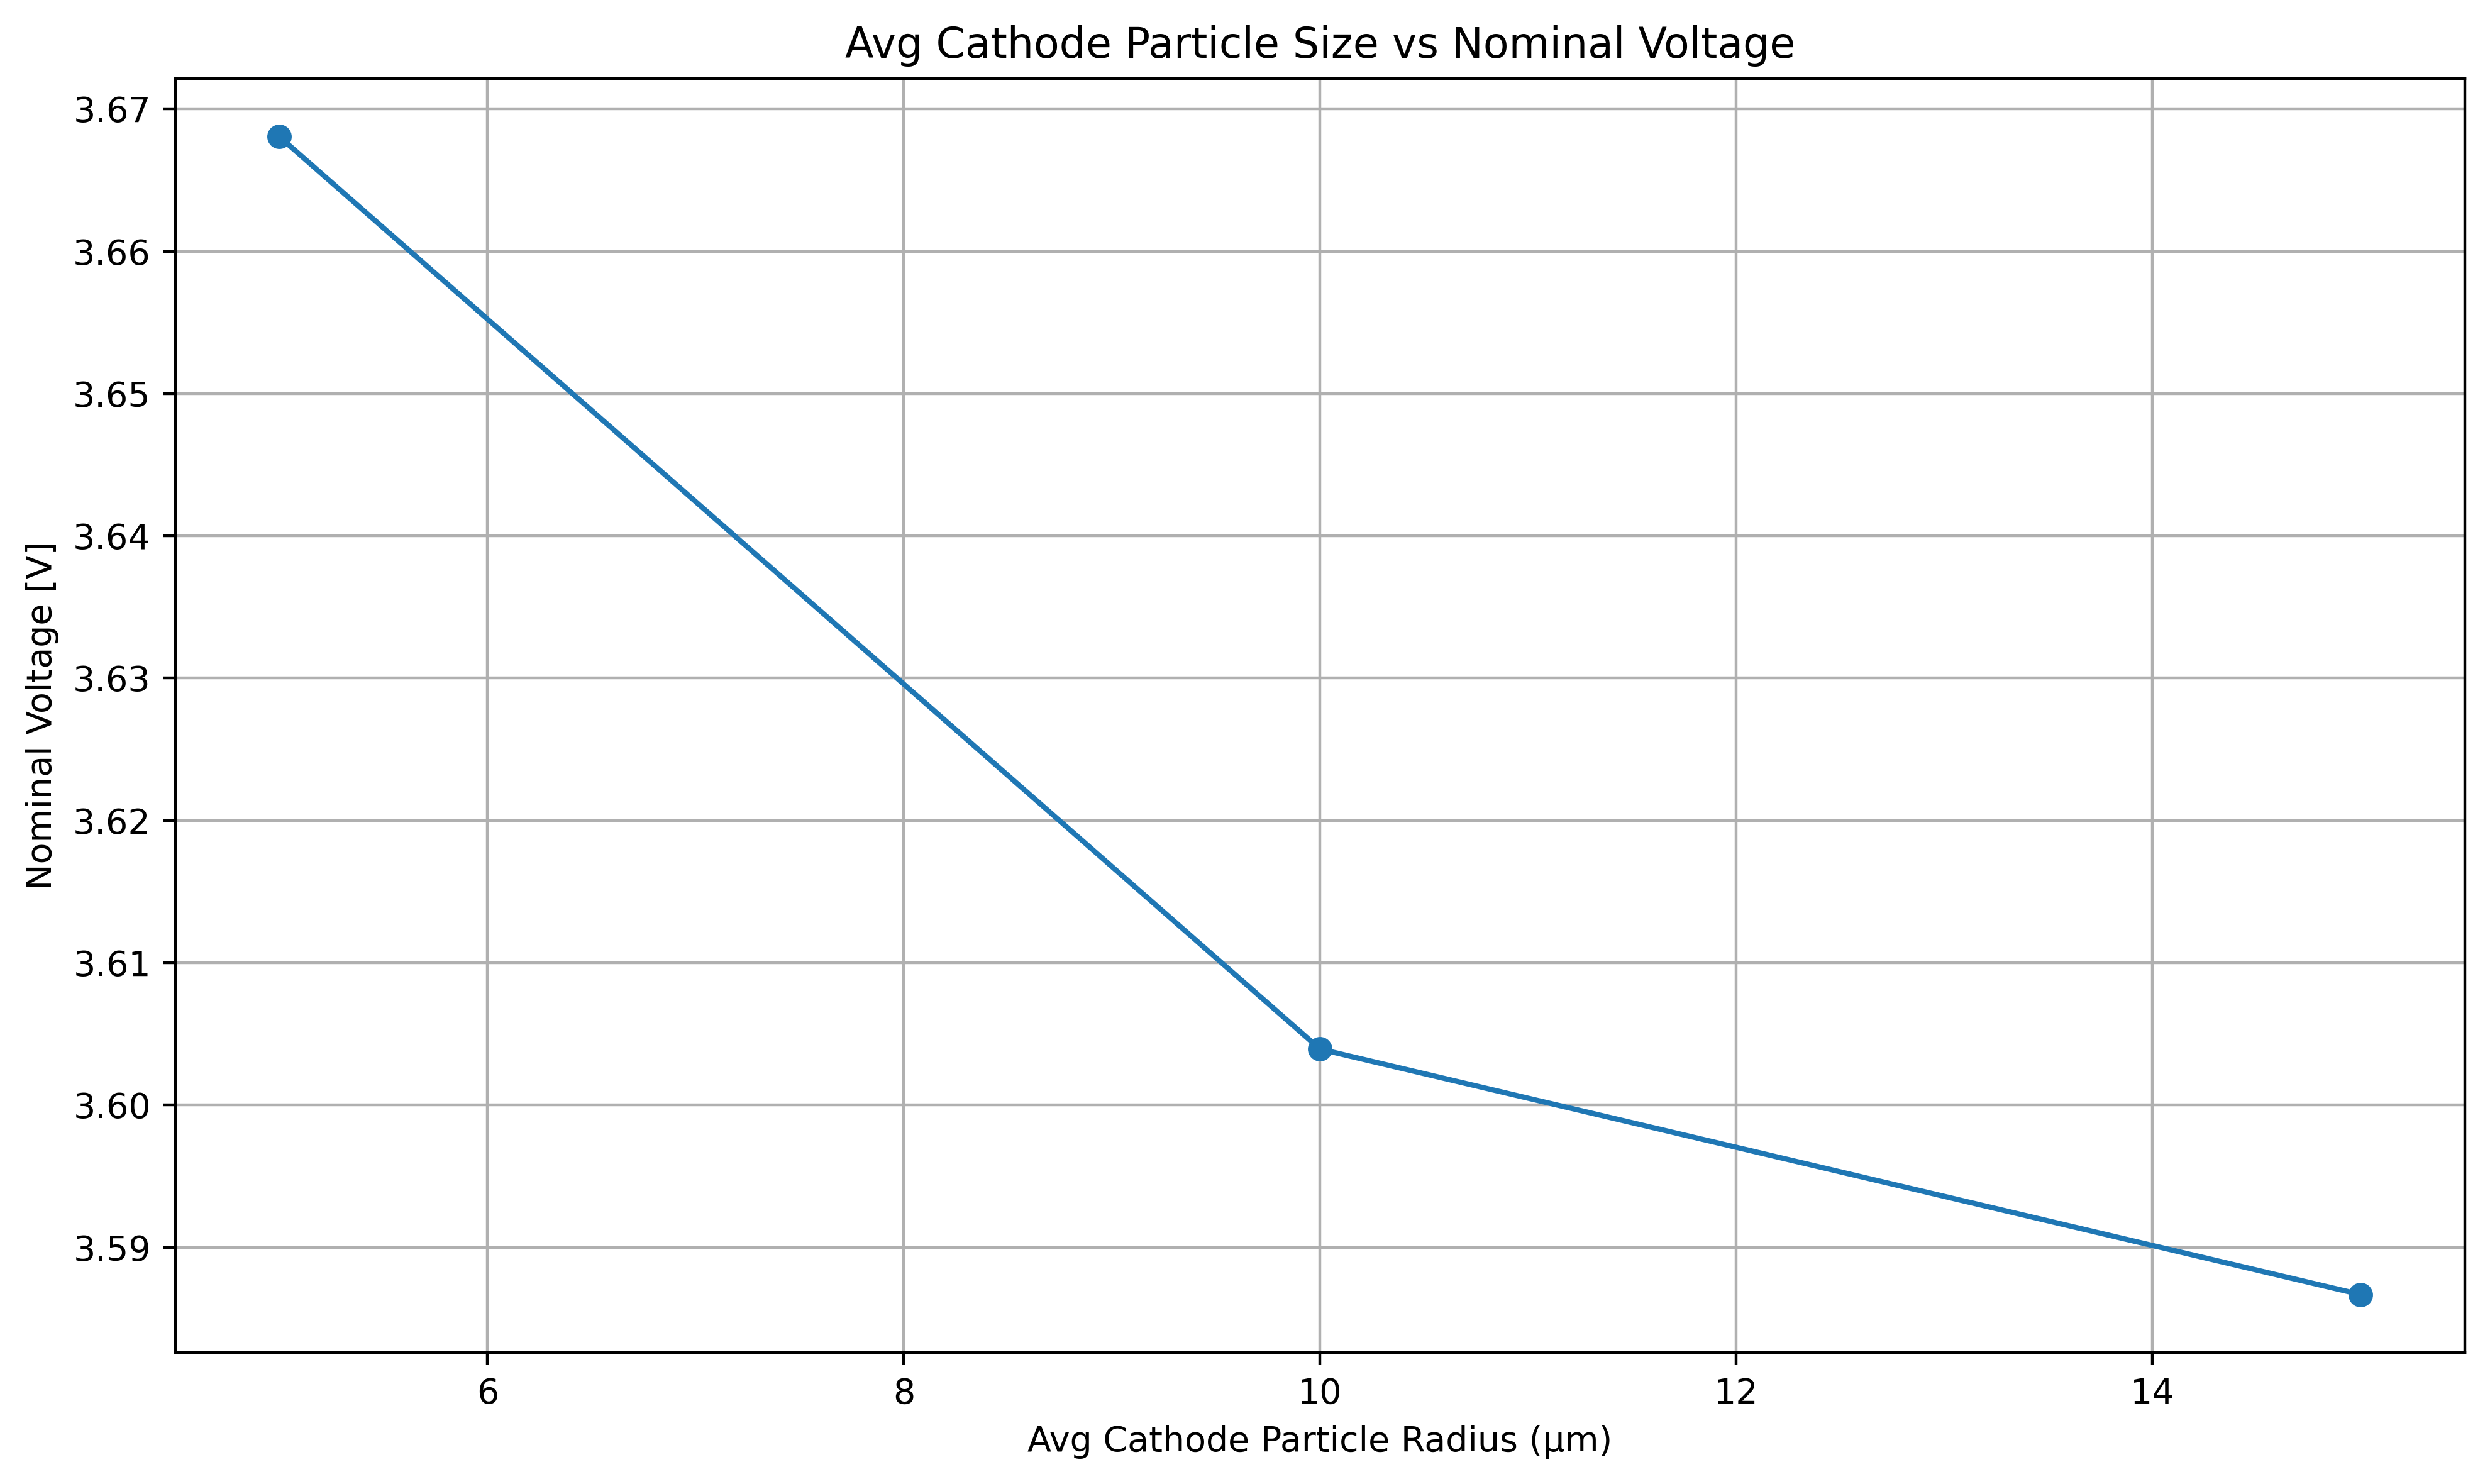

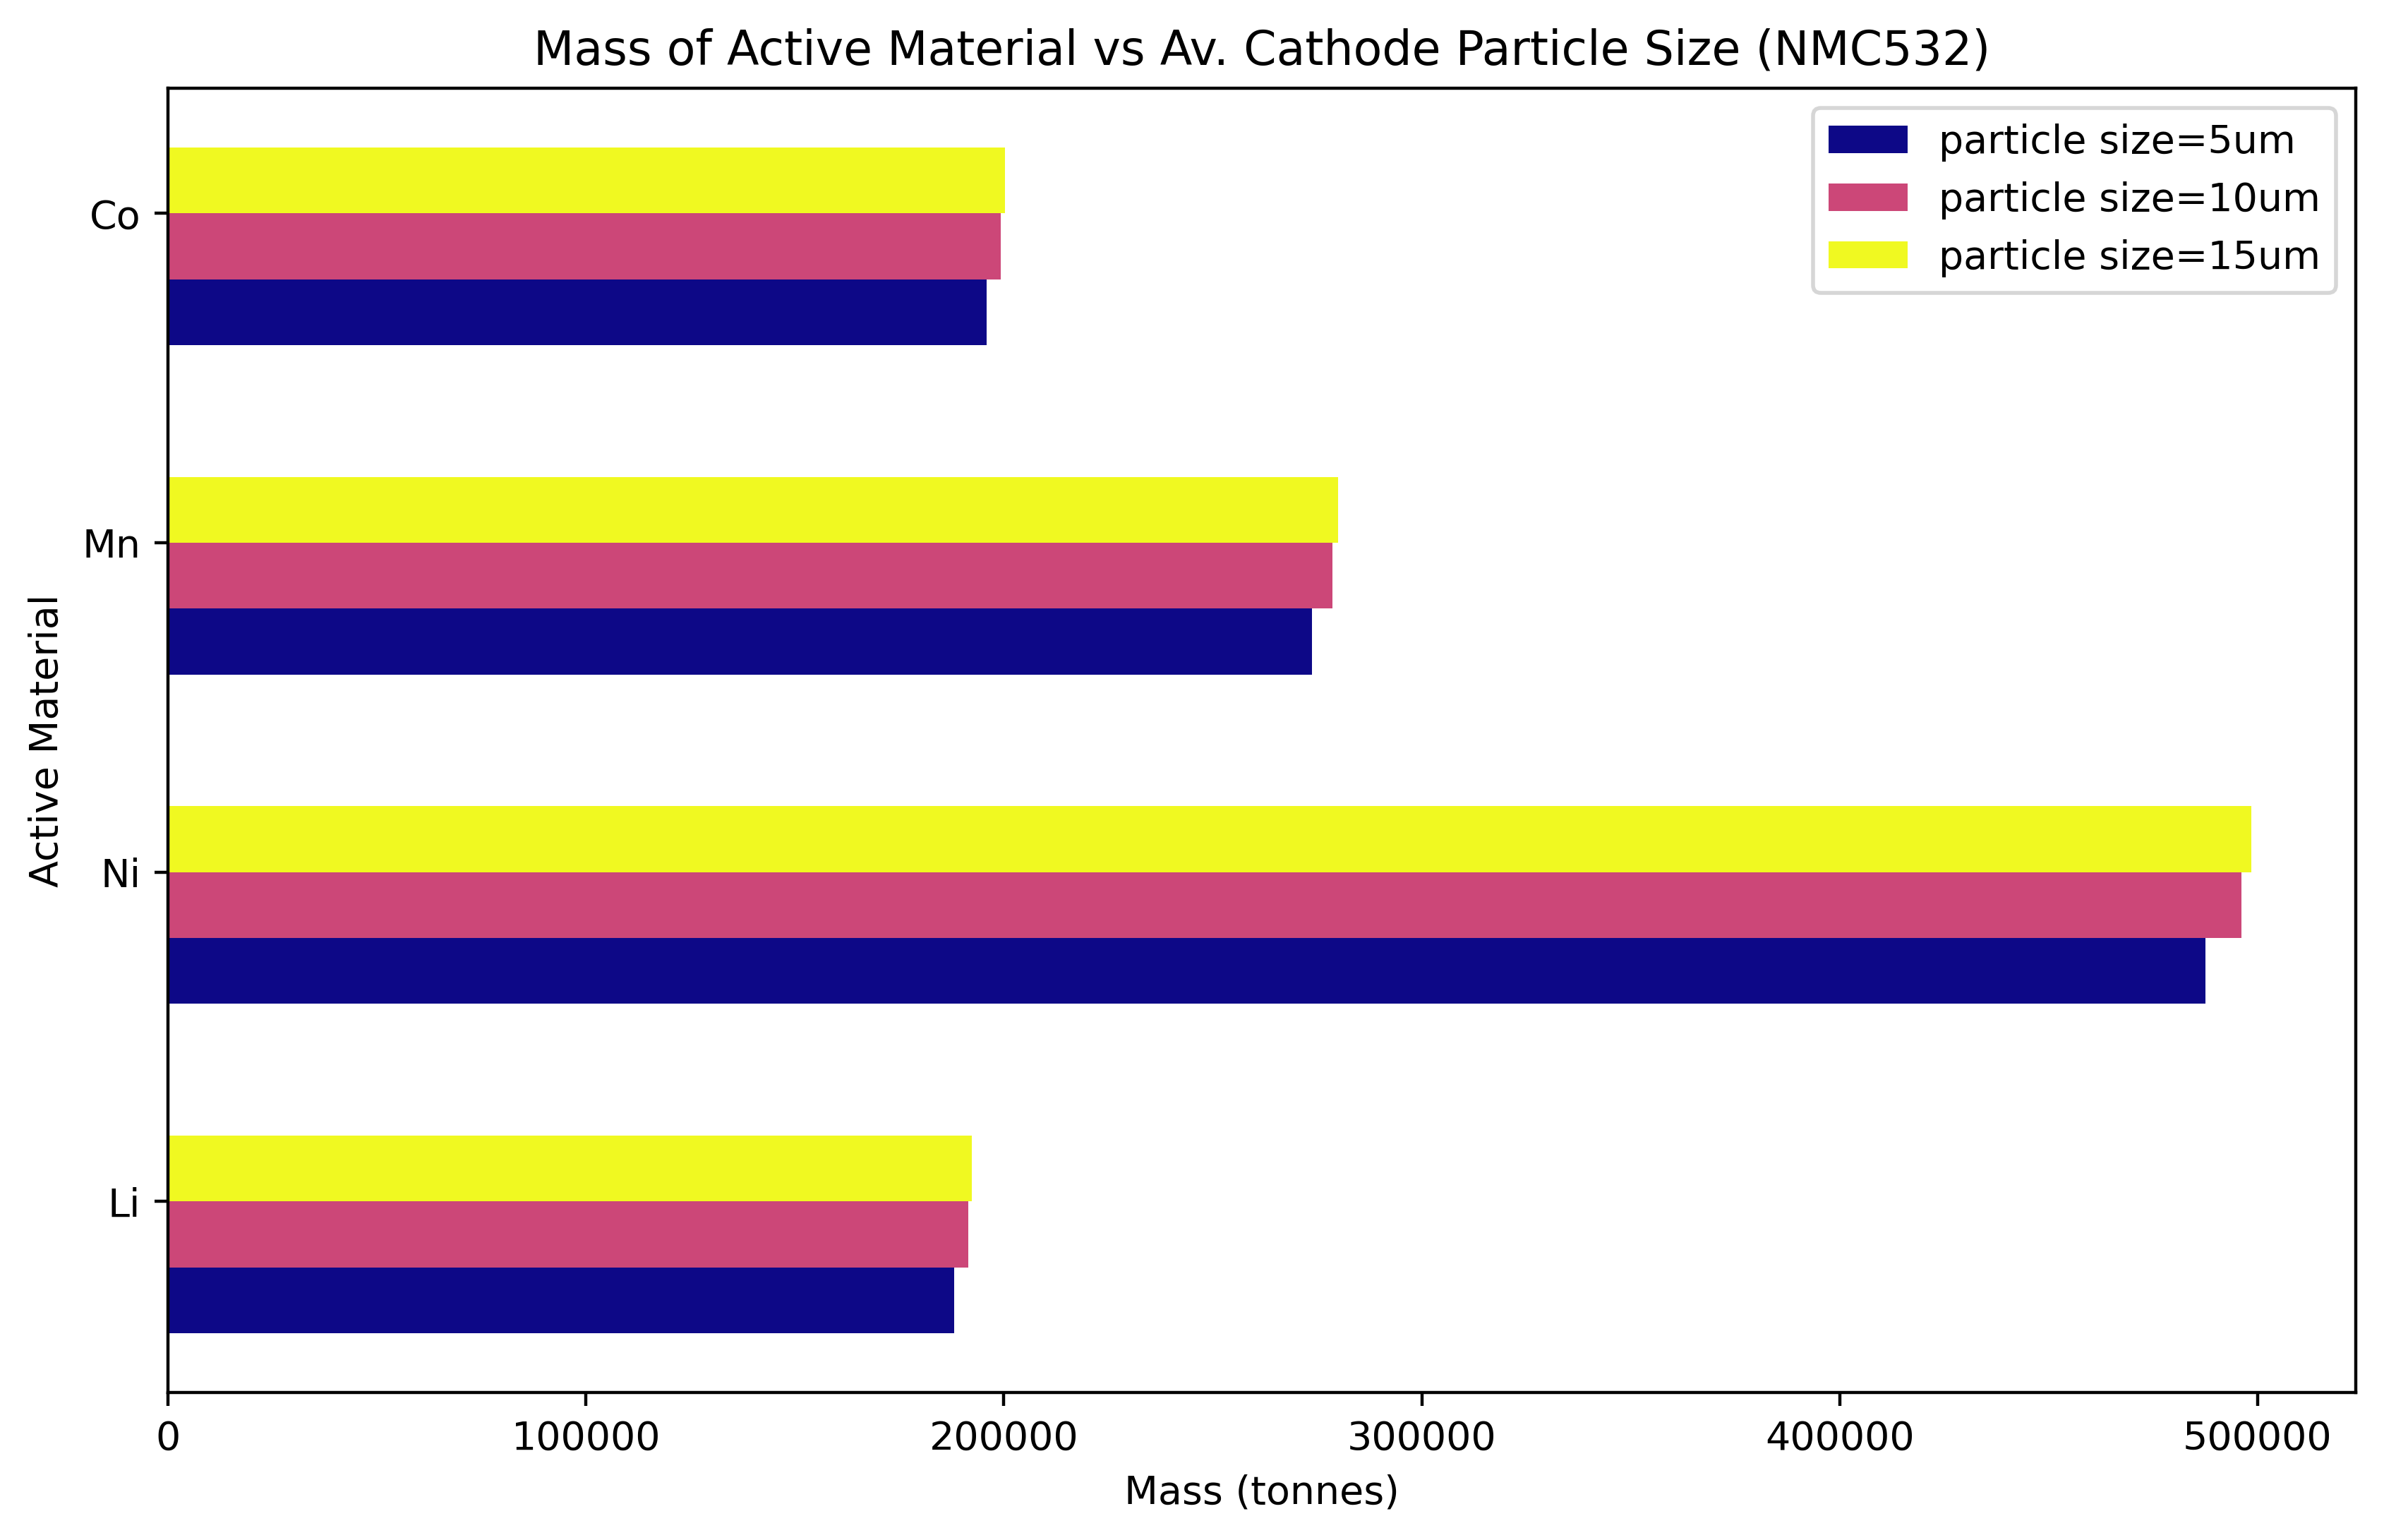

In [32]:
# vary cathode particle size, output mass critical mineral required (NMC532) 

particle_sizes_um = [5, 10, 15]
particle_sizes_m = [r * 1e-6 for r in particle_sizes_um]

av_voltages = []
for radius_m in particle_sizes_m:
    print(f"Solving for radius = {radius_m * 1e6:.0f} µm")

    try:
        # Set up model and parameters
        model = pybamm.lithium_ion.DFN()
        params = pybamm.ParameterValues("Mohtat2020")
        params.update({"Positive particle radius [m]": radius_m})
        # params.update({"Current function [A]": 5}) default is 5 A

        # Use a more stable solver (Casadi-based)
        solver = pybamm.CasadiSolver(rtol=1e-6, atol=1e-8)
        
        # Build and run the simulation
        sim = pybamm.Simulation(model, parameter_values=params, solver=solver)
        solution = sim.solve([0, 3600], initial_soc=1.0)

        # Compute average voltage
        voltage = np.mean(solution["Voltage [V]"].data)
        av_voltages.append(voltage)

    except pybamm.SolverError as e:
        print(f"Solver failed for radius = {radius_m * 1e6:.0f} µm. Error: {e}")
        av_voltages.append(np.nan)  

# Plot the results
plt.figure(dpi=400, figsize=(10, 6))
plt.plot(particle_sizes_um, av_voltages, marker='o', linestyle='-', color='tab:blue')
plt.xlabel("Avg Cathode Particle Radius (µm)")
plt.ylabel("Nominal Voltage [V]")
plt.title("Avg Cathode Particle Size vs Nominal Voltage")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(dpi=400, figsize=(10, 6))
from matplotlib import colormaps as cmap
cmap = plt.cm.plasma
colors = cmap(np.linspace(0,1,len(av_voltages)))
names = ['Li', 'Ni', 'Mn', 'Co']
for i, (voltage, size, color) in enumerate(zip(av_voltages,particle_sizes_um,colors)): # i is the enumerate index, (voltage,porosity,color) each gets asigned the corresponding tuple value from zip
    mass = AM_calc(1000, voltage, "NMC532") # CHANGE CHEMISTRY 
    y_pos = np.arange(len(names)) + i*0.2
    plt.barh(y_pos, mass, color=color, height = 0.2, label = f'particle size={size}um') 

plt.yticks(np.arange(len(names)) + 0.3, names)
plt.legend()
plt.xlabel('Mass (tonnes)')
plt.ylabel('Active Material')
plt.title('Mass of Active Material vs Av. Cathode Particle Size (NMC532)')
plt.show()

Input varying cathode thickness, output mass of critical mineral required, for 1. NMC811, 2. NMC532

At t = 250.866 and h = 3.76036e-12, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 250.866 and h = 3.76035e-12, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 105.413 and h = 3.77452e-12, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 32.6857 and h = 6.16175e-12, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 32.6857 and h = 6.16246e-12, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 13.9356 and h = 3.76323e-12, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 4.56061 and h = 3.77417e-12, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 4.56067 and h = 2.8898e-15, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 2.21686 and h = 1.11641e-12, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 1.04498 and h = 3.76283e-12, the corrector convergence failed repeatedly or with |h| = hmin.
A

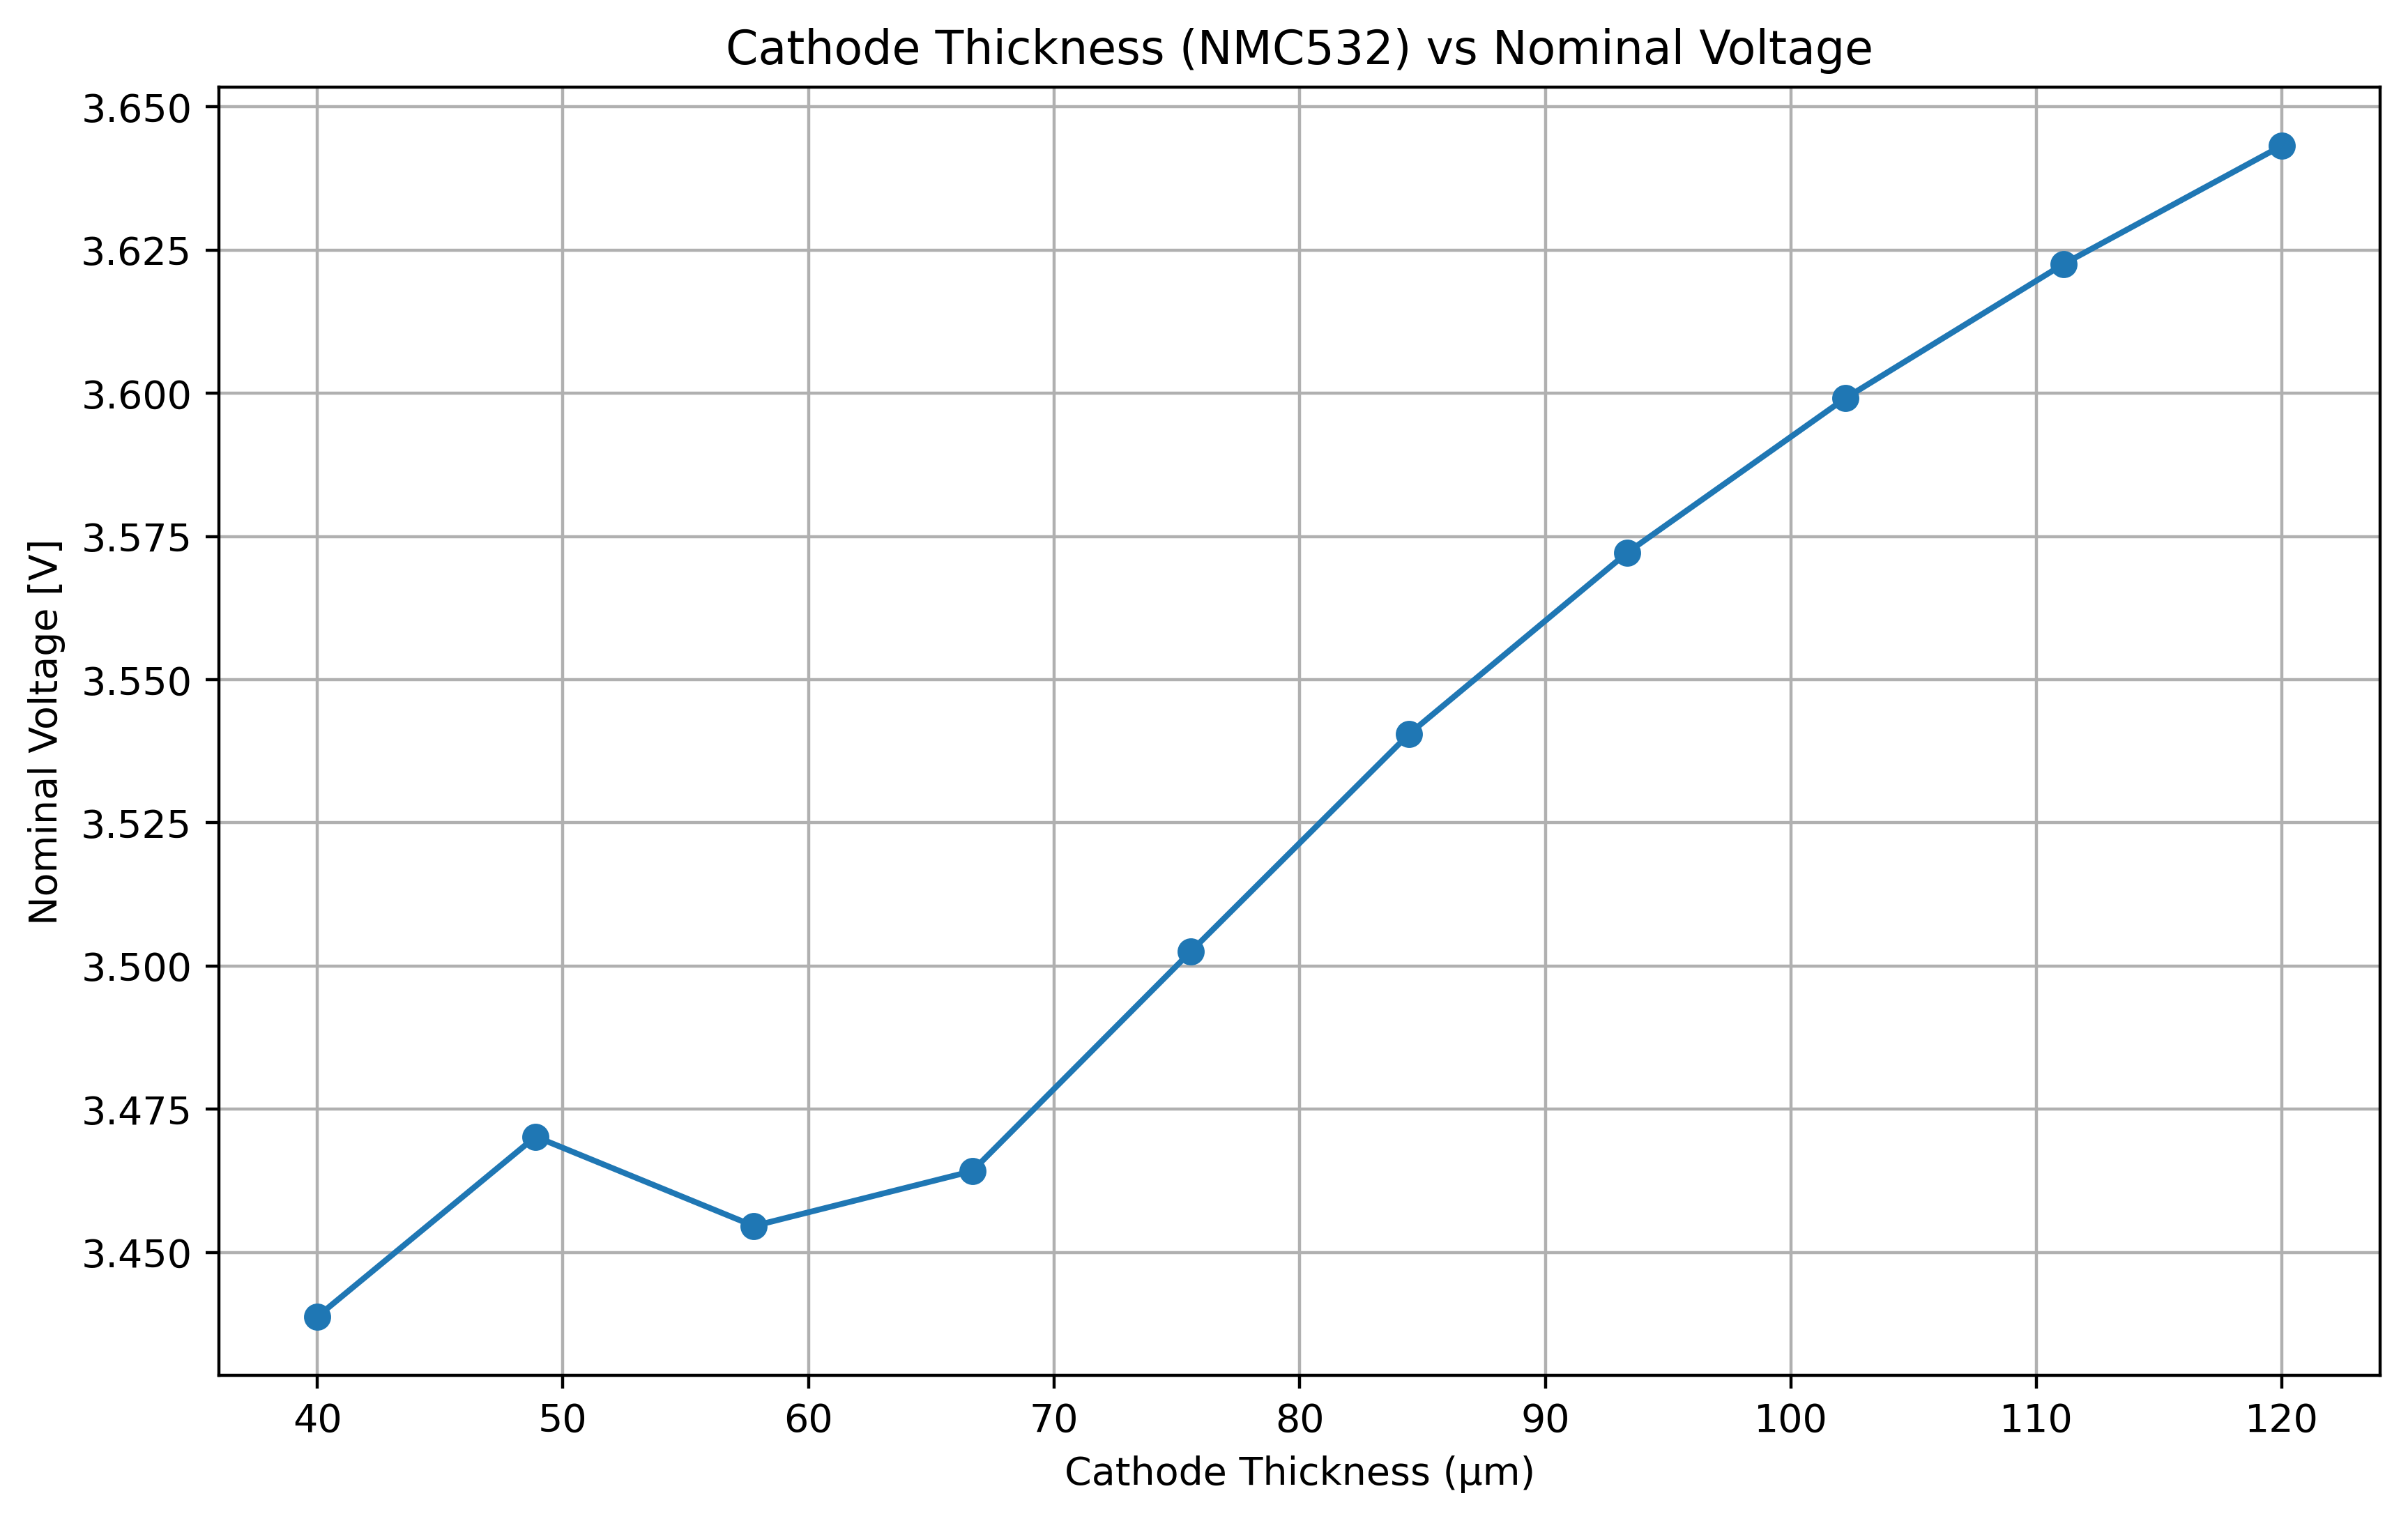

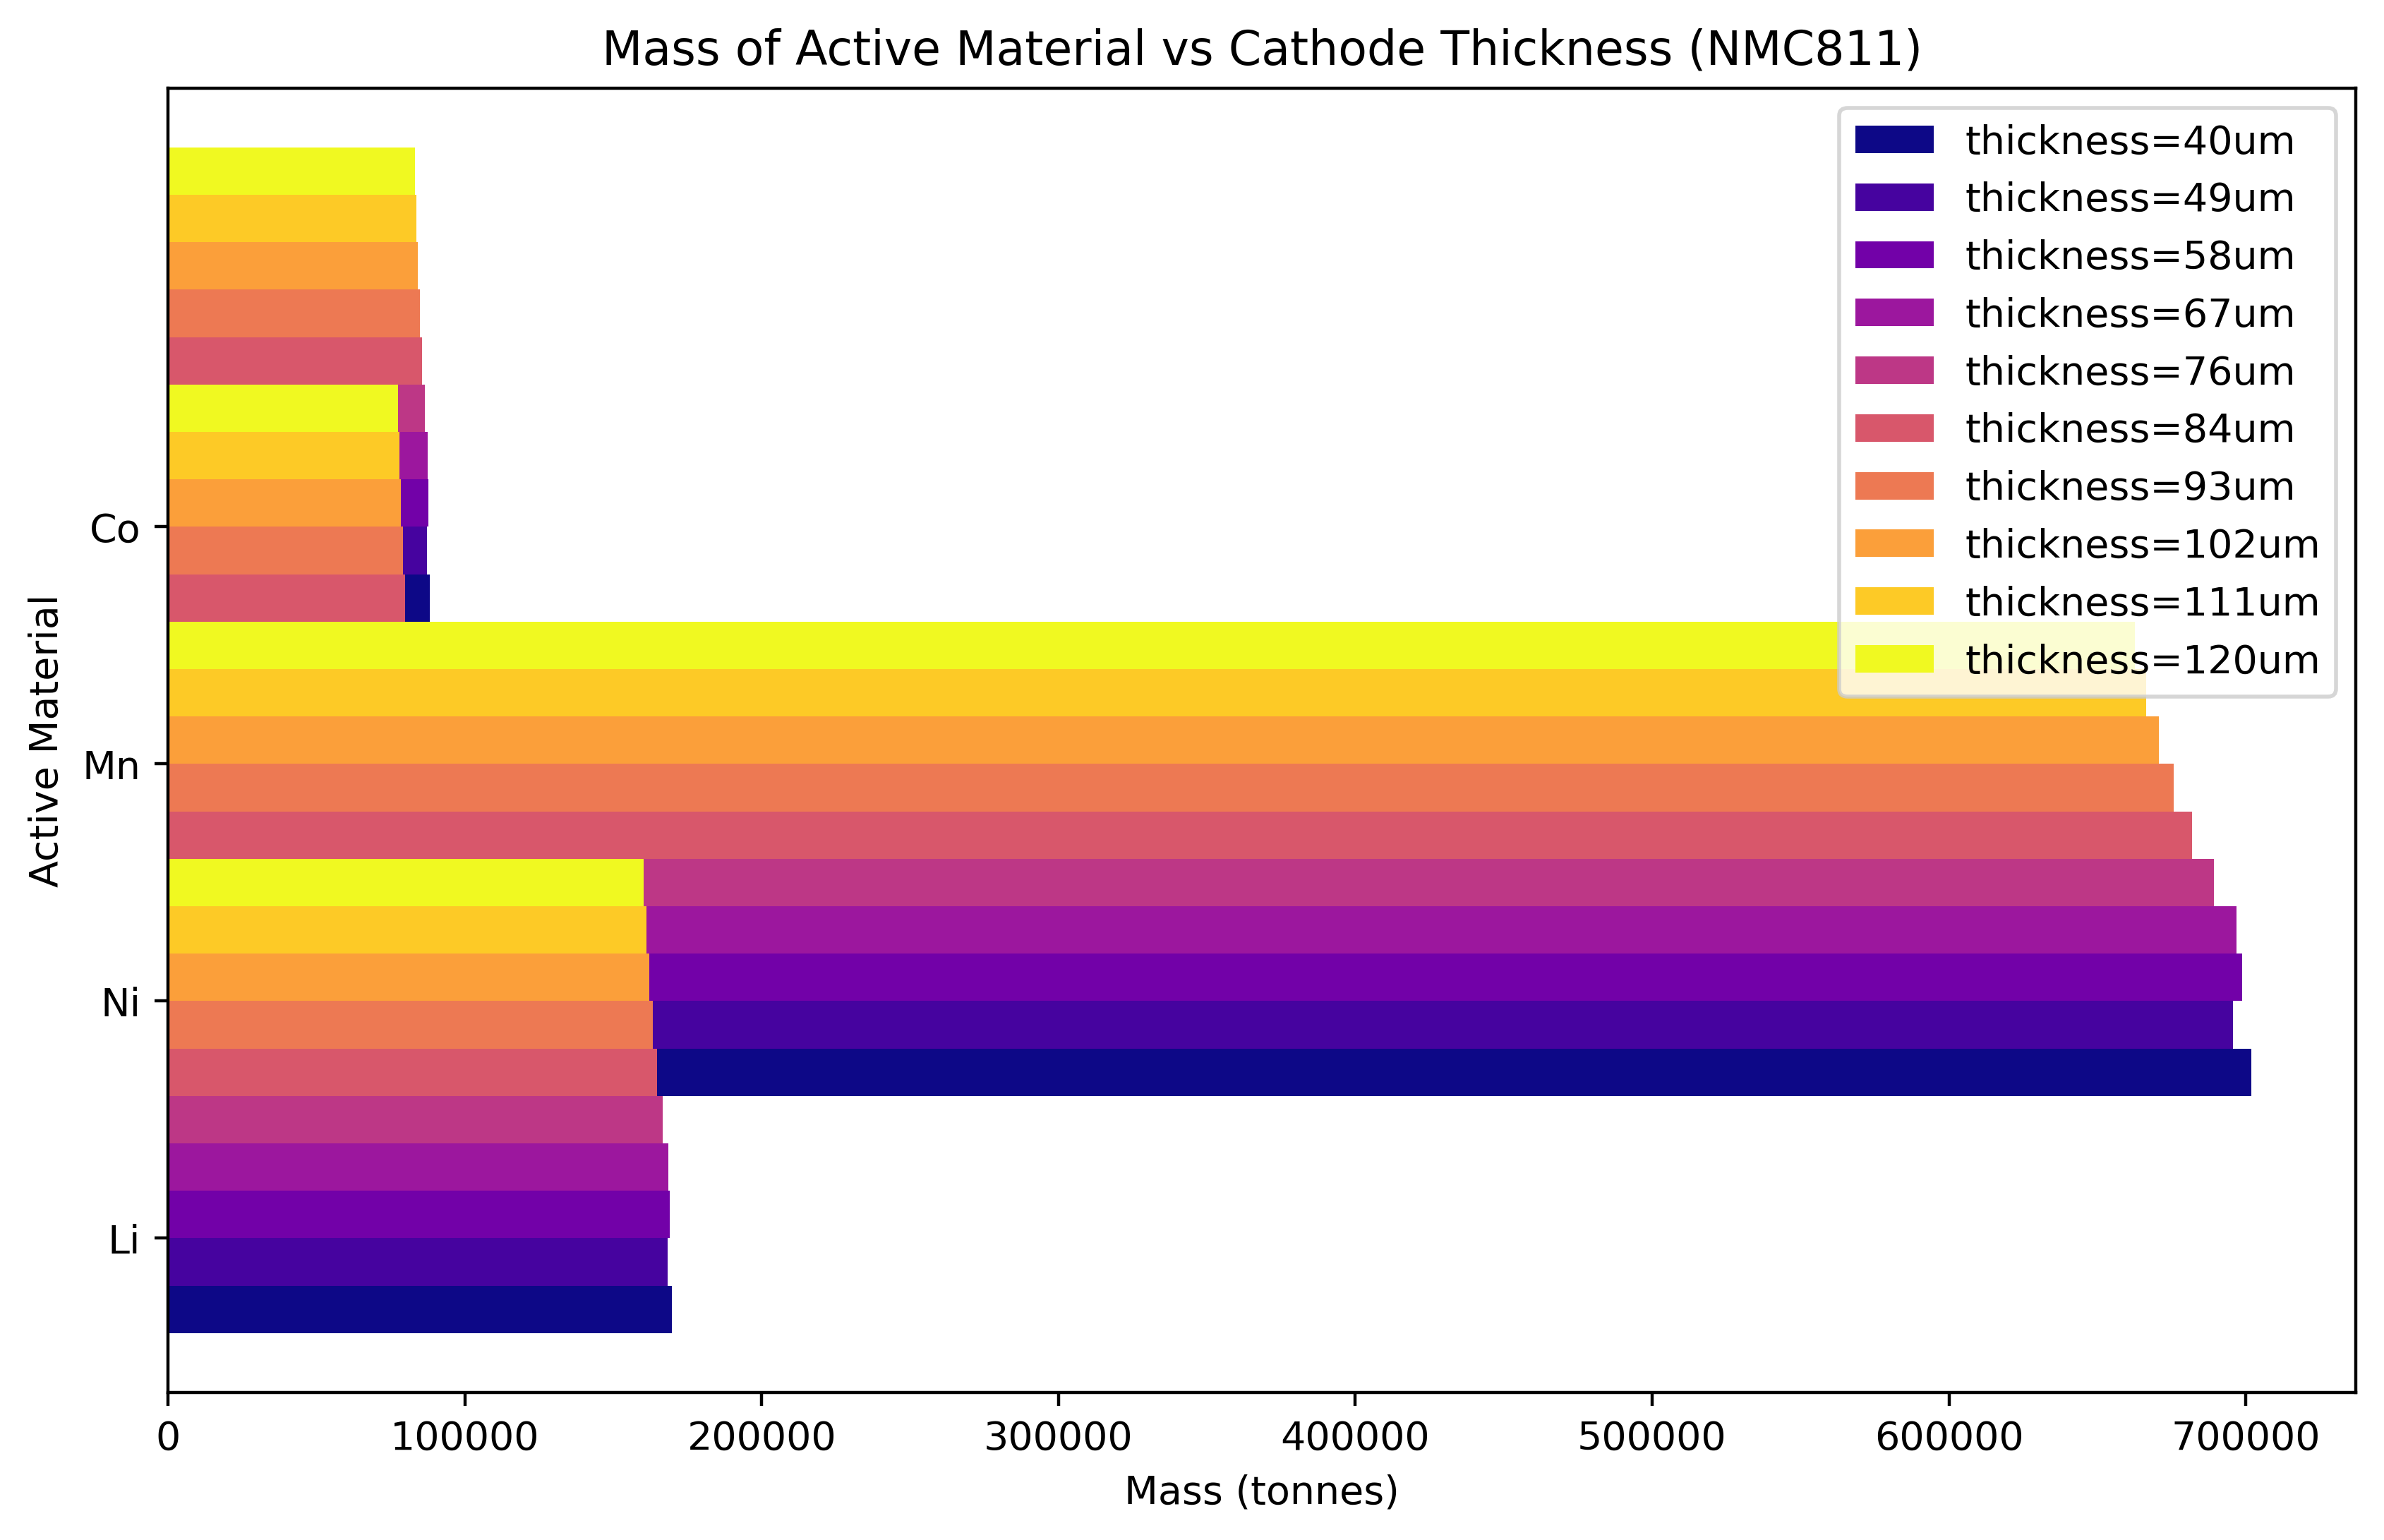

In [35]:
# vary cathode thickness for nominal voltage output (NMC811)

# defalt from params is 5 Ah cell nominal capacity , use 5 A current over 1 hr for 1C
# when changing thickness, need to recalculate capacity and current for 1C 

model = pybamm.lithium_ion.DFN()

param = pybamm.ParameterValues("Chen2020")
solver = pybamm.CasadiSolver(rtol=1e-4, atol=1e-6) # loosening tolerances to accomidate initial conditions 

# cathode thicknesses (meters)
thickness_values = np.linspace(40e-6, 120e-6, 10)  # 40 to 120 microns, cath. default 67um 

av_voltages = []

# recalculating capacity and 1C current: assumptions 
#material_cap = 0.195 # NMC532 capacity in Ah/g
#density = 2450000 # 2.45 g/cm^3 tap density, 2.45 * 10^6 g/m^3
#loading = 0.955

for L in thickness_values:
    # Update parameter values with new cathode thickness and currents 
    param.update({"Positive electrode thickness [m]": L})
    # params.update({"Current function [A]": "[input]"}) default 5 A
    

    # updating current based on new capacity 
    #C_rate = 1  # 1C discharge
    #grams = (L * (params['Electrode height [m]']*(10**-6)) * (params['Electrode width [m]']*(10**-6))) * (density) * (loading) # mass of active material
    #capacity = material_cap * grams # Ah/g * g
    #current = capacity / C_rate # Ah / h = Ampere current 

    sim = pybamm.Simulation(model, parameter_values=param, solver=solver)
    sim.solve([0, 3600], initial_soc=1.0)


    voltage = sim.solution["Voltage [V]"].entries
    avg_voltage = voltage.mean()
    av_voltages.append(avg_voltage)

plt.figure(dpi=400, figsize=(10, 6))
plt.plot(thickness_values * 1e6, av_voltages, marker='o')
plt.xlabel("Cathode Thickness (μm)")
plt.ylabel("Nominal Voltage [V]")
plt.title("Cathode Thickness (NMC532) vs Nominal Voltage")
plt.grid(True)
plt.show()

plt.figure(dpi=400, figsize=(10, 6))
from matplotlib import colormaps as cmap
cmap = plt.cm.plasma
colors = cmap(np.linspace(0,1,len(av_voltages)))
names = ['Li', 'Ni', 'Mn', 'Co']
for i, (voltage, thickness, color) in enumerate(zip(av_voltages,thickness_values,colors)): # i is the enumerate index, (voltage,porosity,color) each gets asigned the corresponding tuple value from zip
    mass = AM_calc(1000, voltage, "NMC811") 
    y_pos = np.arange(len(names)) + i*0.2
    plt.barh(y_pos, mass, color=color, height = 0.2, label = f'thickness={thickness*1000000:.0f}um') 

plt.yticks(np.arange(len(names)) + 0.3, names)
plt.legend()
plt.xlabel('Mass (tonnes)')
plt.ylabel('Active Material')
plt.title('Mass of Active Material vs Cathode Thickness (NMC811)')
plt.show()

At t = 325.933 and h = 4.40027e-16, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 35.0243 and h = 7.31568e-19, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 35.0242 and h = 1.4093e-12, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 35.0243 and h = 1.95394e-20, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 35.0242 and h = 1.7768e-15, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 207.087 and h = 4.57283e-12, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 207.087 and h = 9.43515e-17, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 61.632, repeated recoverable residual errors.
At t = 61.632 and h = 2.1923e-17, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 25.2683 and h = 1.76165e-12, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 99.8437 and h = 4.68848e-12, the corrector c

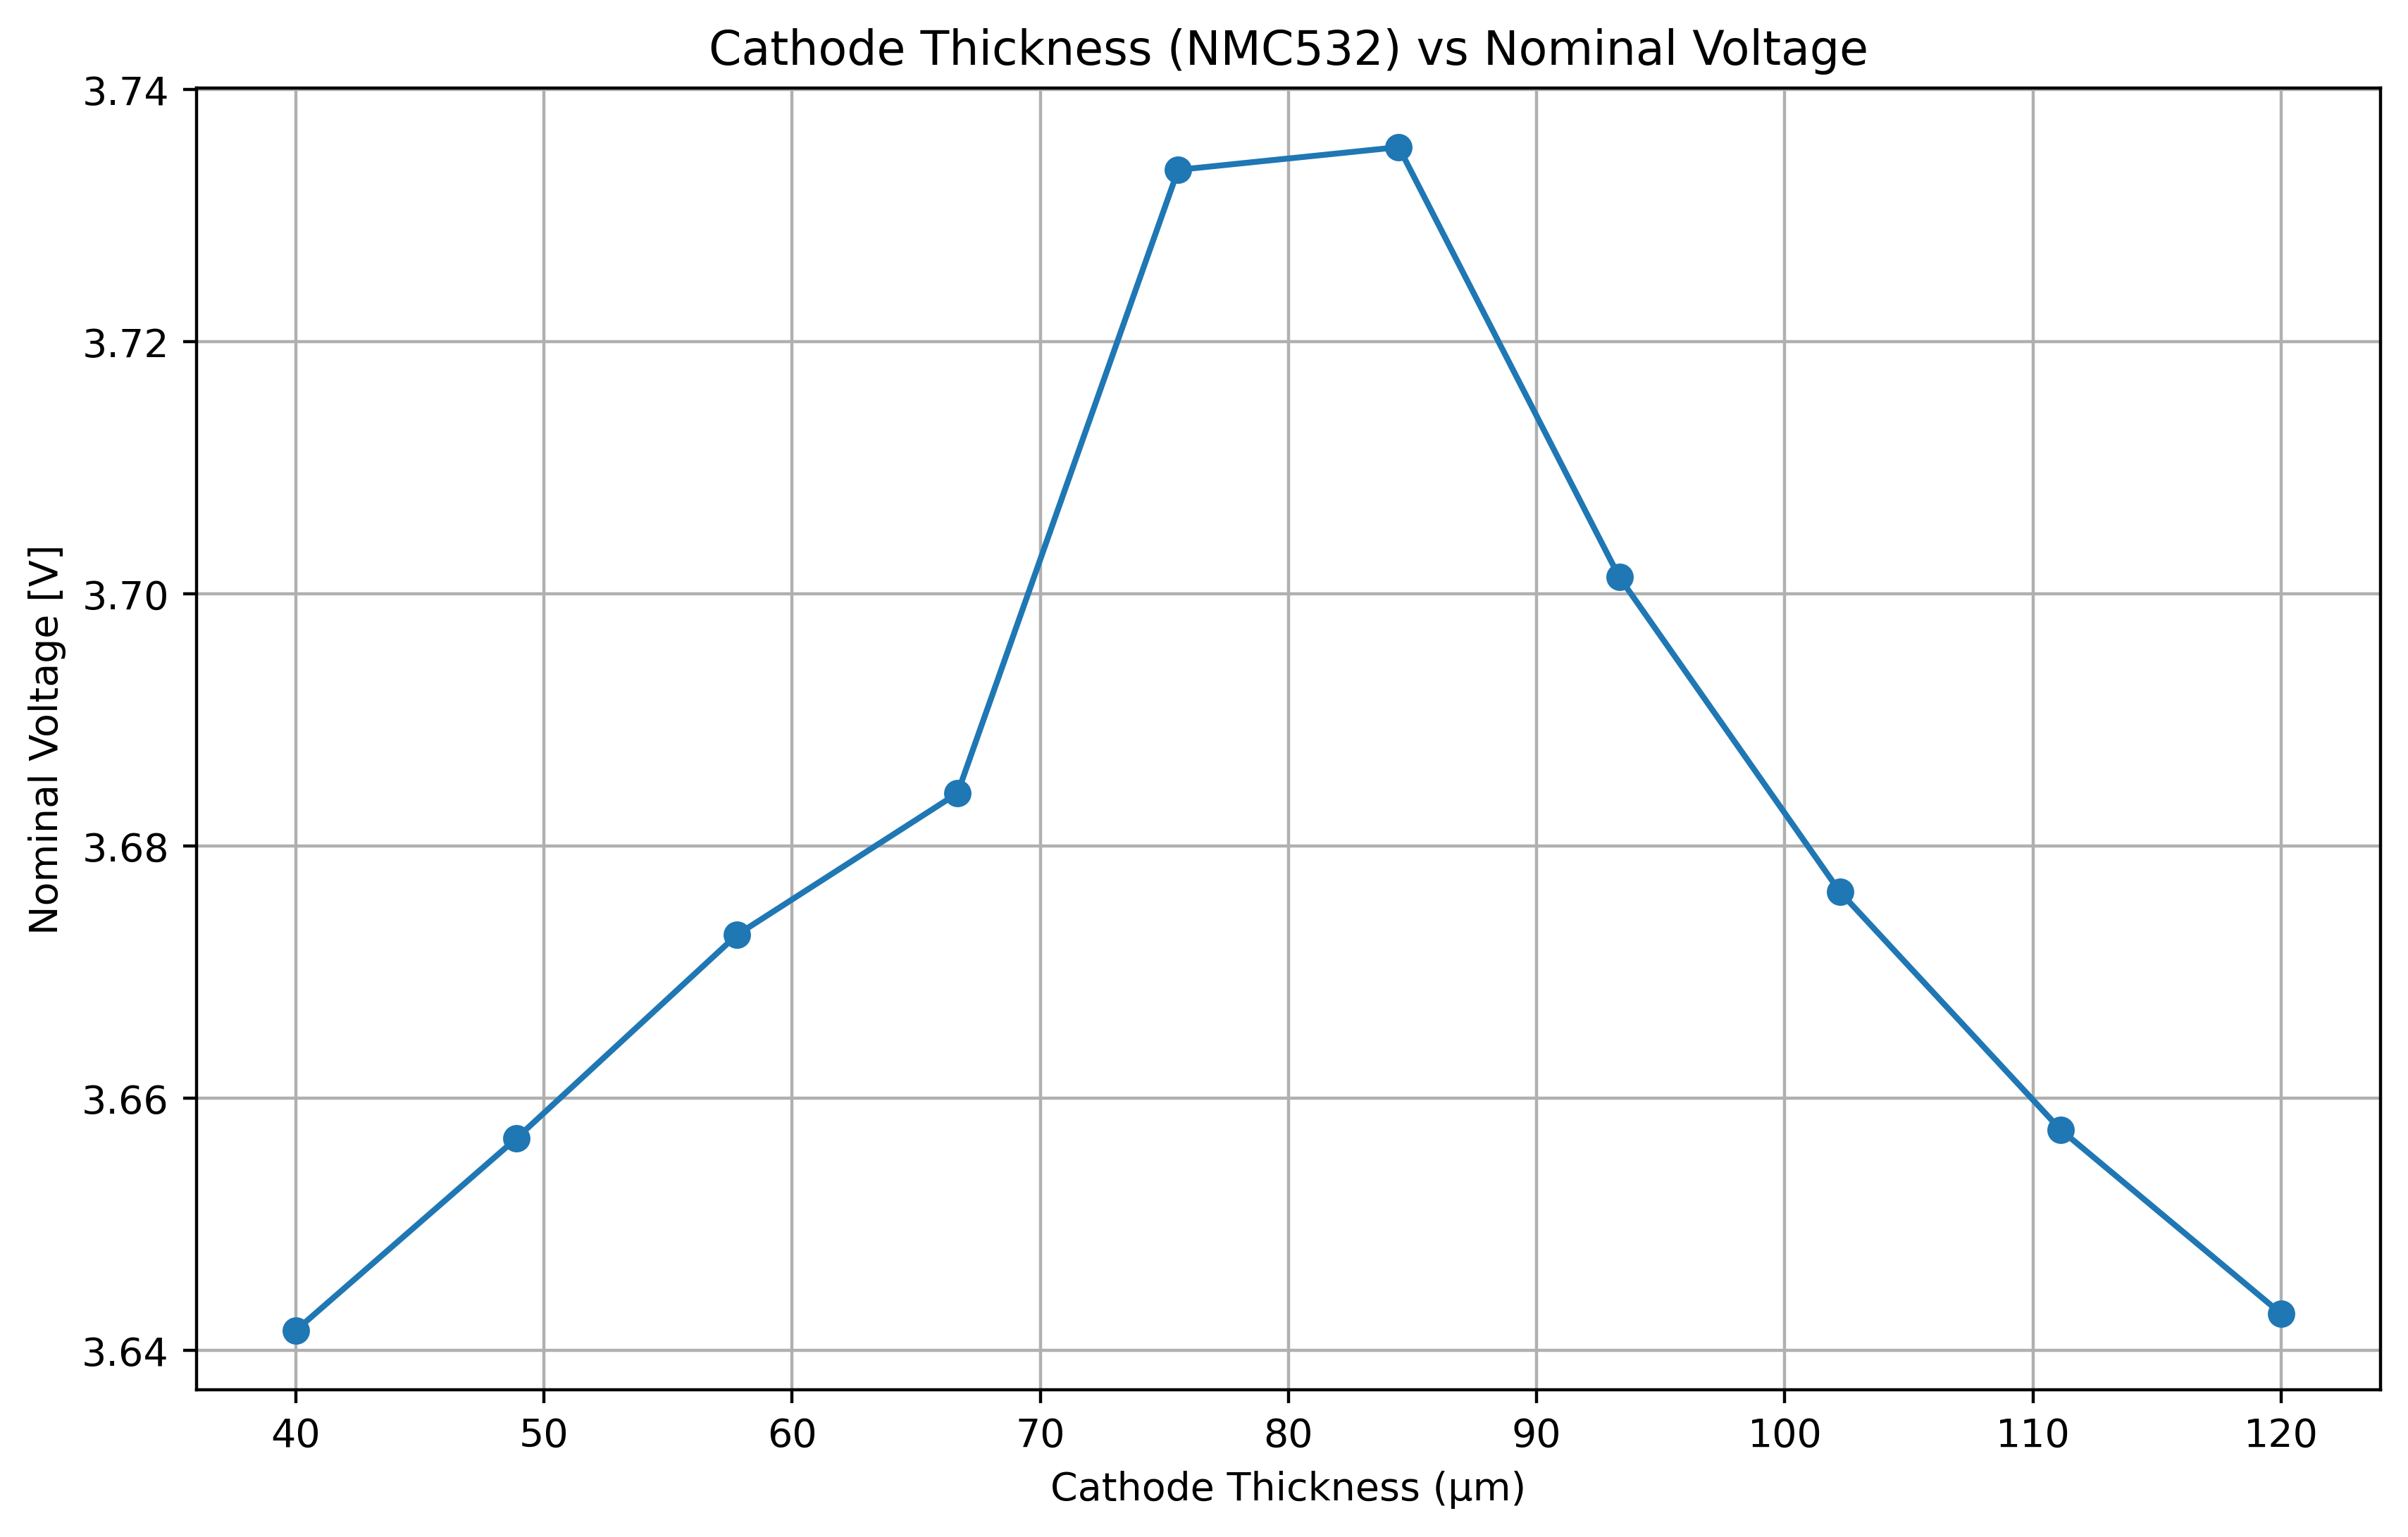

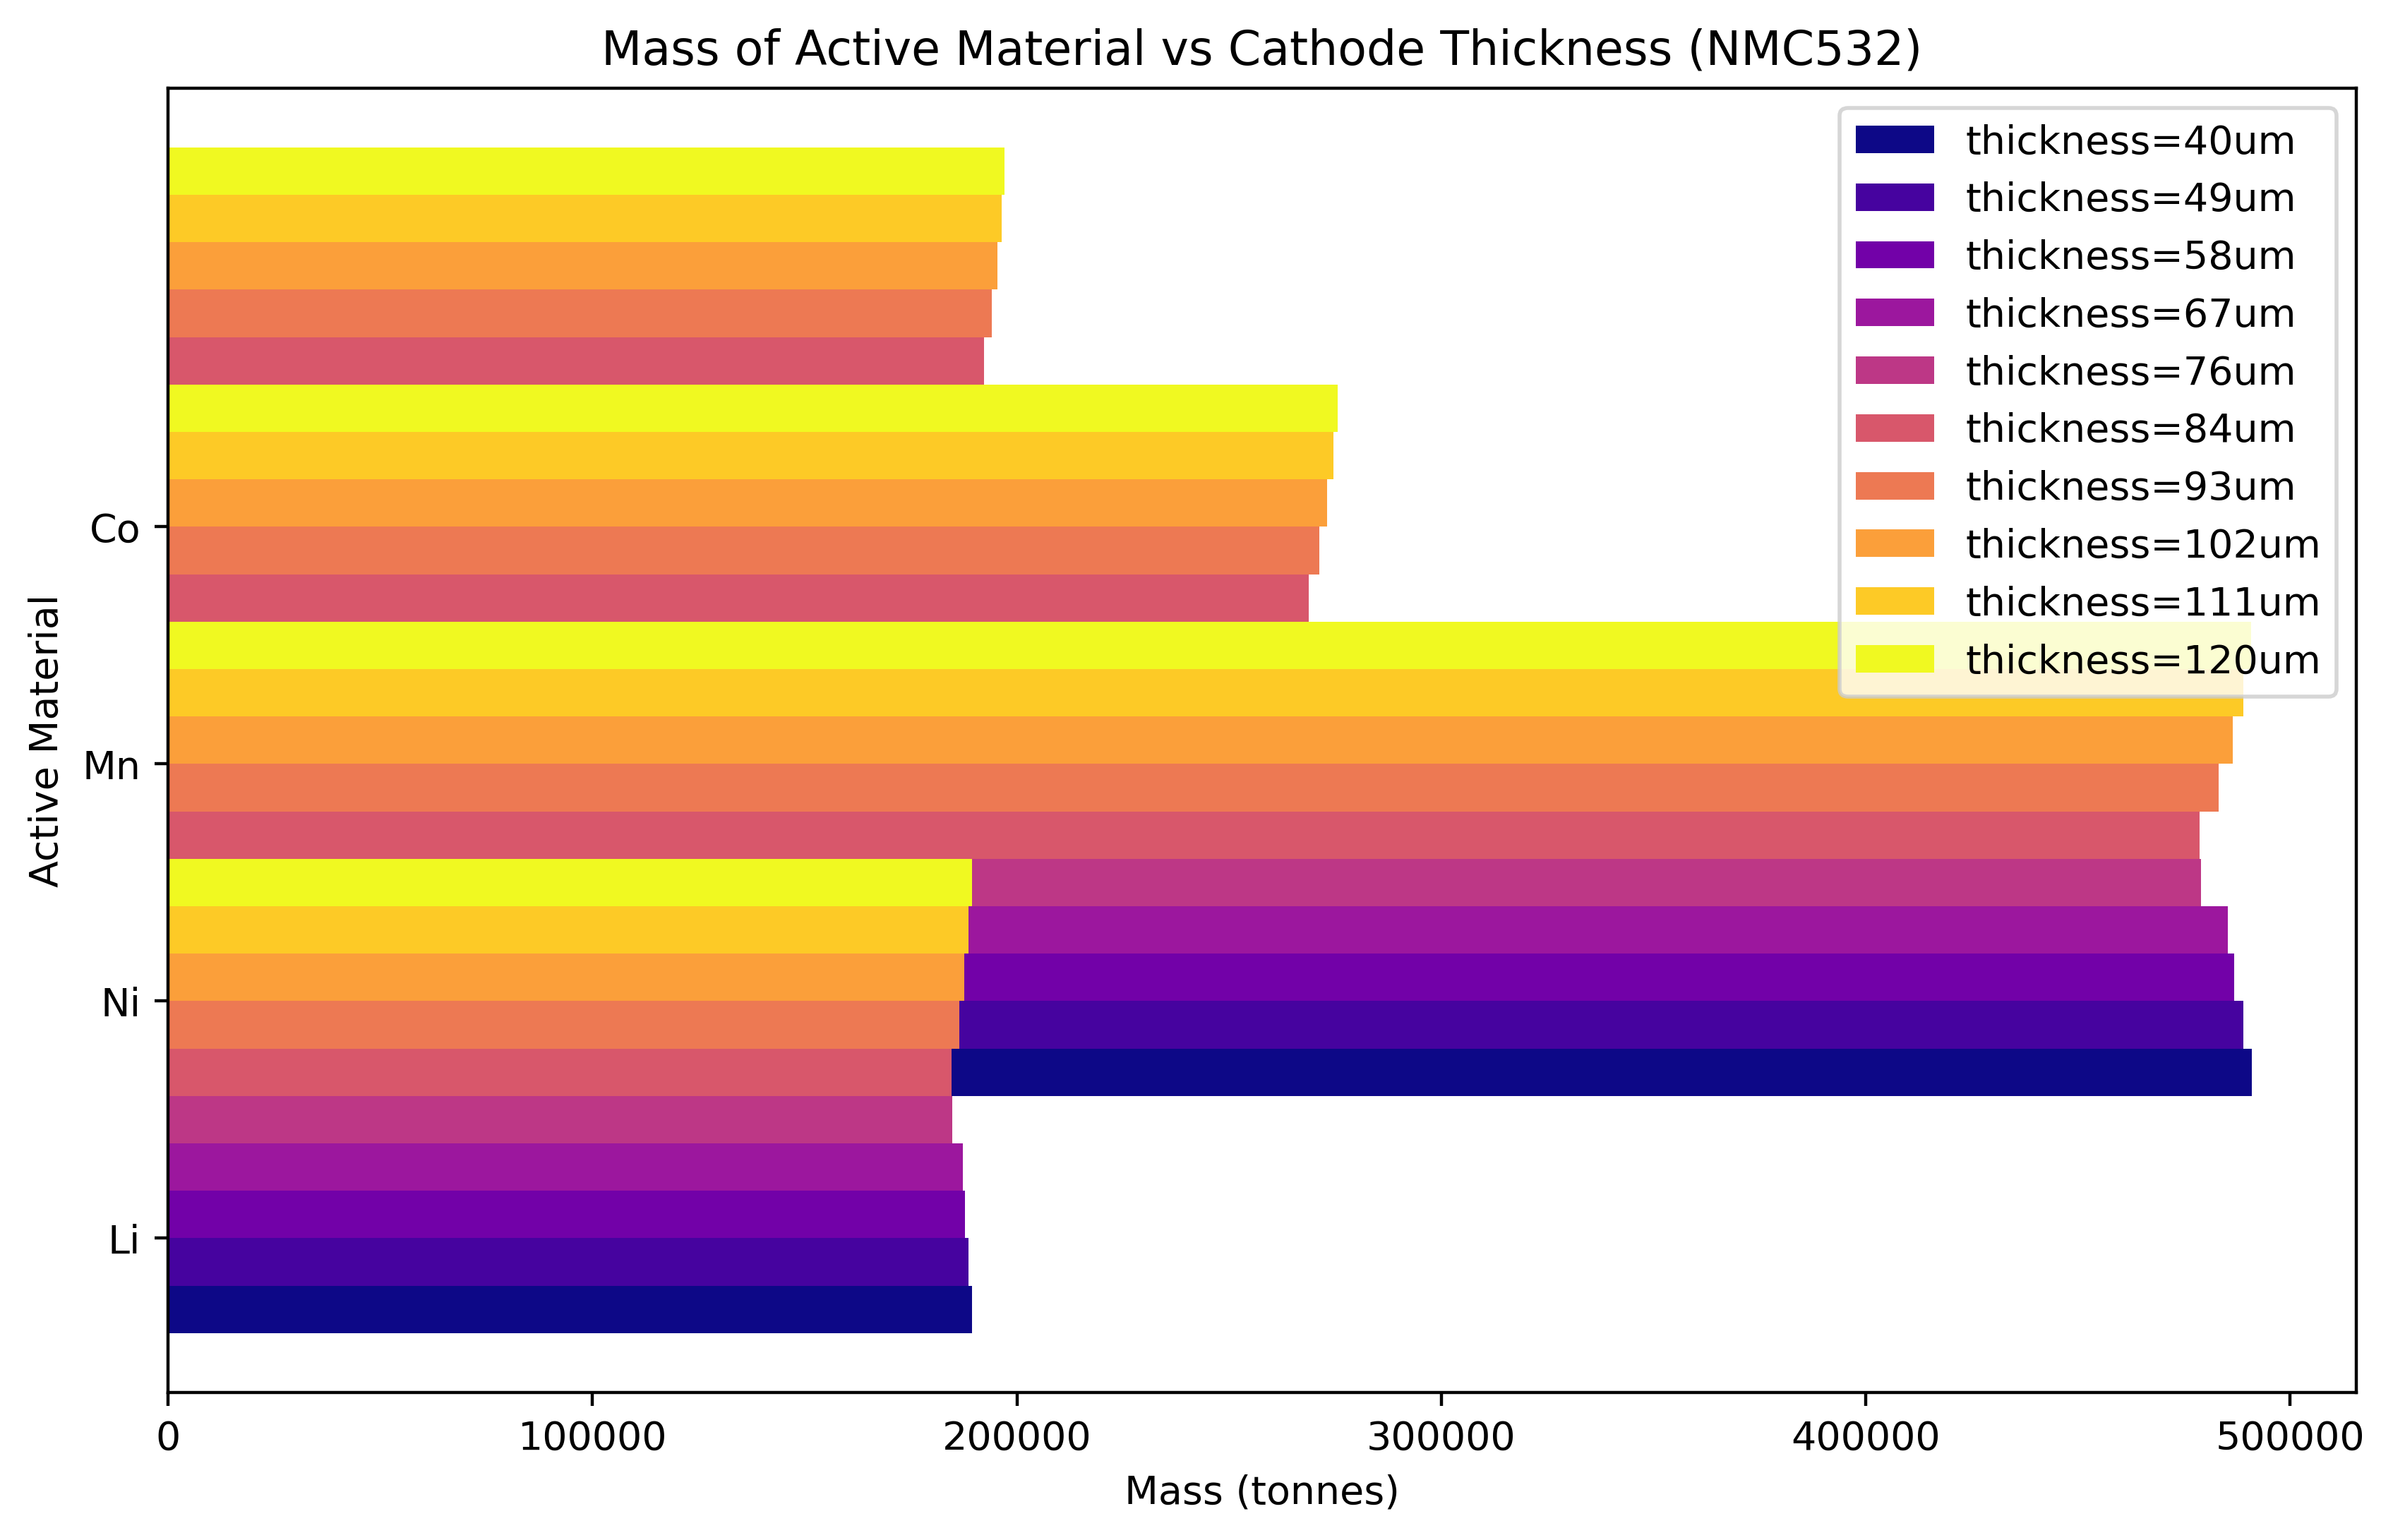

In [36]:
# vary cathode thickness for nominal voltage output (NMC532)

# defalt from params is 5 Ah cell nominal capacity , use 5 A current over 1 hr for 1C
# when changing thickness, need to recalculate capacity and current for 1C 

model = pybamm.lithium_ion.DFN()

param = pybamm.ParameterValues("Mohtat2020")
solver = pybamm.CasadiSolver(rtol=1e-4, atol=1e-6) # loosening tolerances to accomidate initial conditions 

# cathode thicknesses (meters)
thickness_values = np.linspace(40e-6, 120e-6, 10)  # 40 to 120 microns, cath. default 67um 

av_voltages = []

# recalculating capacity and 1C current: assumptions 
#material_cap = 0.165 # NMC532 capacity in Ah/g
#density = 2500000 # 2.5 g/cm^3 tap density, 2.5 * 10^6 g/m^3
#loading = 0.955

for L in thickness_values:
    # Update parameter values with new cathode thickness and currents 
    param.update({"Positive electrode thickness [m]": L})
    #params.update({"Current function [A]": "[input]"}) defaut 5 A
    

    # updating current based on new capacity 
    #C_rate = 1  # 1C discharge
    #grams = (L * (params['Electrode height [m]']*(10**-6)) * (params['Electrode width [m]']*(10**-6))) * (density) * (loading) # mass of active material
    #capacity = material_cap * grams # Ah/g * g
    #current = capacity / C_rate # Ah / h = Ampere current 

    sim = pybamm.Simulation(model, parameter_values=param, solver=solver)
    sim.solve([0, 3600], initial_soc=1.0)


    voltage = sim.solution["Voltage [V]"].entries
    avg_voltage = voltage.mean()
    av_voltages.append(avg_voltage)

plt.figure(dpi=400, figsize=(10, 6))
plt.plot(thickness_values * 1e6, av_voltages, marker='o')
plt.xlabel("Cathode Thickness (μm)")
plt.ylabel("Nominal Voltage [V]")
plt.title("Cathode Thickness (NMC532) vs Nominal Voltage")
plt.grid(True)
plt.show()

plt.figure(dpi=400, figsize=(10, 6))
from matplotlib import colormaps as cmap
cmap = plt.cm.plasma
colors = cmap(np.linspace(0,1,len(av_voltages)))
names = ['Li', 'Ni', 'Mn', 'Co']
for i, (voltage, thickness, color) in enumerate(zip(av_voltages,thickness_values,colors)): # i is the enumerate index, (voltage,porosity,color) each gets asigned the corresponding tuple value from zip
    mass = AM_calc(1000, voltage, "NMC532") 
    y_pos = np.arange(len(names)) + i*0.2
    plt.barh(y_pos, mass, color=color, height = 0.2, label = f'thickness={thickness*1000000:.0f}um') 

plt.yticks(np.arange(len(names)) + 0.3, names)
plt.legend()
plt.xlabel('Mass (tonnes)')
plt.ylabel('Active Material')
plt.title('Mass of Active Material vs Cathode Thickness (NMC532)')
plt.show()